# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the **model evaluation** (and interpretation if applicable), a **data visualization(s)** of your choice that is directly related to the question you ask, **ethical considerations**, and the **resources** you used to troubleshoot and find answers or solutions.


**First, let's clarify:**

You're predicting whether an employee will leave the company → this is a binary classification task, not regression.

So by "regression model," the question probably refers to logistic regression, which is commonly used for binary outcomes.

**When to Use Logistic Regression (a type of regression model):**

| Use logistic regression when...                         | Why                                                                                                                                                 |
| ------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------- |
| **You need interpretability**                           | Logistic regression gives you clear coefficients showing how each feature influences the outcome. Good for HR explaining "why" someone might leave. |
| **Your data is relatively small and clean**             | It performs well with smaller datasets and is robust to overfitting.                                                                                |
| **The relationship between variables is mostly linear** | It assumes a linear relationship between features and the log-odds of the outcome.                                                                  |
| **You want a fast baseline**                            | It’s quick to implement and often a good first model to test.                                                                                       |


**When to Use Machine Learning Models (like Random Forest, XGBoost, Neural Nets):**

| Use ML models when...                                   | Why                                                                                                             |
| ------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------- |
| **You care more about predictive accuracy**             | ML models often outperform logistic regression in terms of raw prediction accuracy, especially on complex data. |
| **You have complex, nonlinear relationships**           | Algorithms like random forest or gradient boosting handle non-linearities and interactions better.              |
| **You have a lot of features or high-dimensional data** | ML models can manage large feature sets and find hidden patterns.                                               |
| **You have enough data**                                | Many ML models perform better with large datasets.                                                              |


**Summary Table**

| Scenario                                               | Action                                                             |
| ------------------------------------------------------ | ------------------------------------------------------------------ |
| Small, interpretable dataset                           | Logistic Regression                                                |
| Large, complex dataset                                 | ML Model (Random Forest, XGBoost, etc.)                            |
| Need explainable predictions for business stakeholders | Logistic Regression or Explainable ML    |
| Focused on maximizing prediction accuracy              | ML Model                                                           |


**Tip:**
    
In practice, try both:
   * Start with logistic regression as a baseline.
   
   * Then try machine learning models to see if performance improves.
   
   * Use cross-validation and metrics like accuracy, precision, recall, F1-score, AUC to compare.

# **PACE stages**


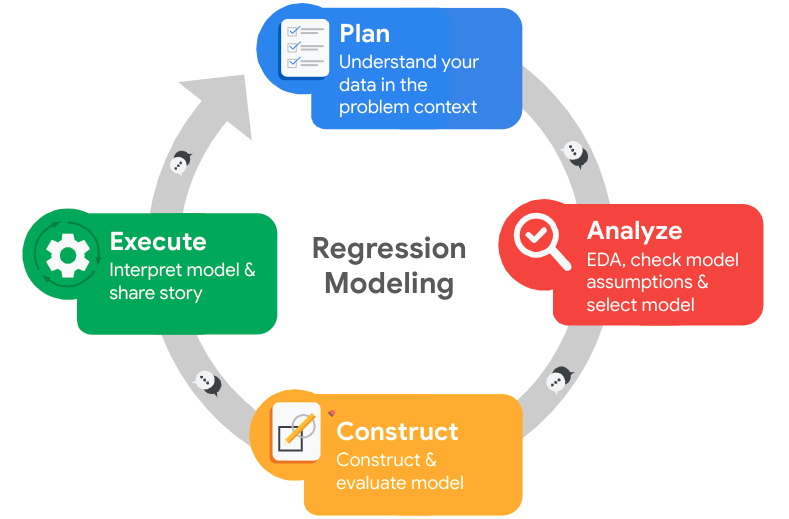

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to **improve employee satisfaction levels** at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [294]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# Import packages for statistical analysis/hypothesis testing
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle
import os

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [295]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset_Salifort.csv")

df = df0.copy()

# Display first few rows of the dataframe
df.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [296]:
# Gather basic information about the data
df.shape

(14999, 10)

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [298]:
# Gather descriptive statistics about the data
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

* **Satisfaction Level:** The mean is 0.6128 and the median is 0.64, indicating the data is not skewed.

* **Average Monthly Hours:** The distribution appears balanced, though some individuals work as few as 96 hours per month while others work up to 310.

* **Time Spent at the Company:** The mean is 3.5 years, with a minimum of 2 years and a maximum of 10 years of tenure.

* **Left:** This variable requires further analysis as it is the main outcome of interest, directly tied to employee retention.

* **Promotion in Last 5 Years:** Only one employee has received a promotion in the past five years.

* **Department and Salary:** Both could also be significant factors influencing employee retention and merit further exploration.

### Rename columns

In [299]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [300]:
# Rename columns as needed
df = df.rename(columns={
    'average_montly_hours': 'average_monthly_hours',
    'Work_accident': 'work_accident',
    'time_spend_company': 'tenure',
    'Department': 'department'
})

### Check missing values

Check for any missing values in the data.

In [301]:
# Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [302]:
# Check for duplicates
df.duplicated().sum()

np.int64(3008)

In [303]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()]

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  tenure  work_accident  left  \
396                      139       3              0     1   
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461                     142       3              0     1   
...                      ...     ...            ...   ...   
14994                    151       3              0     1   
14995                    160       3              0     1   
14996                    143       3              0     1   
14997                    280       4              0     1   
14998                    158       3              0     1   

       promotion_last_5years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
...                      ...         ...     ...  
14994                      0     support     low  
14995                      0     support     low  
14996                      0     support     low  
14997                      0     support     low  
14998                      0     support     low  

[3008 rows x 10 columns]

In [304]:
# Drop duplicates and save resulting dataframe in a new variable as needed
# - 'first': Keeps the first occurrence of each duplicate and removes the rest
df = df.drop_duplicates(keep='first')

When looking at **satisfaction level**, the data shows a mean of 0.6128 and a median of 0.64, suggesting it’s not skewed and that most employees’ satisfaction is close to the average. Interestingly, while the standard deviation is relatively small at 0.143 (meaning most employees feel similarly satisfied), the range is quite wide at 0.96, which indicates that a few employees are either very satisfied or very dissatisfied. This variation in satisfaction levels might be worth exploring, as it could directly relate to why some people stay while others leave.

For **average monthly hours**, the data doesn’t show significant skew, but there’s a notable spread — some employees work as few as 96 hours a month, while others work up to 310. This suggests differences in workload that might affect stress levels and, ultimately, retention.

Regarding **time spent at the company**, the mean tenure is 3.5 years, with some employees having been there for as little as 2 years and others for as long as 10. This indicates a mix of new and long-serving staff that might have different perspectives on satisfaction and retention.

The variable **left** definitely needs closer examination. Since the goal is to understand and improve employee retention, analyzing why people leave will be crucial.

The **promotion in the last five years** data is telling: there has been only one promotion recorded in that period. This might reflect limited opportunities for growth, which can negatively impact retention.

Lastly, **department and salary** are also factors that could play a significant role in employee turnover and should be analyzed alongside the other variables to get a comprehensive view of what’s driving people to stay or leave.

### Hypothesis testing

In [305]:
# 1. T-test (satisfaction_level ~ left) + manual Cohen's d
group_left = df[df['left'] == 1]['satisfaction_level']
group_stayed = df[df['left'] == 0]['satisfaction_level']

ttest, p_value = stats.ttest_ind(group_left, group_stayed, equal_var=False)
print(f"T-test = {ttest:.4f}, p-value = {p_value:.6f}\n")

T-test = -35.8893, p-value = 0.000000



In [306]:
df_ttest = df.copy()
t_test_metric = df_ttest.drop(columns=['left', 'department', 'salary'])

metrics = {}
for metric in t_test_metric.columns:
        group_left = df_ttest[df_ttest['left'] == 1][metric]
        group_stayed = df_ttest[df_ttest['left'] == 0][metric]
           # Convert to numeric in case of hidden strings
        group_left = pd.to_numeric(group_left, errors='coerce')
        group_stayed = pd.to_numeric(group_stayed, errors='coerce')
        ttest, p_value = stats.ttest_ind(group_left, group_stayed, equal_var=False)
        metrics[metric] = {'t_test': ttest, 'p_value': p_value}

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')

# Reset index to turn metric names into a column
metrics_df = metrics_df.reset_index().rename(columns={'index': 'metric'})

# Sort by p-value
metrics_df = metrics_df.sort_values(by='p_value')

# Optional: round values for readability
metrics_df = metrics_df.round({'t_test': 3})

metrics_df

metric  t_test        p_value
0     satisfaction_level -35.889  1.193954e-228
4                 tenure  24.050  5.787450e-119
5          work_accident -19.371   1.914951e-80
6  promotion_last_5years  -7.816   6.311454e-15
3  average_monthly_hours   6.369   2.267947e-10
2         number_project   2.308   2.110164e-02
1        last_evaluation   1.298   1.943907e-01

In [307]:
# Create a contingency table
dept_contingency = pd.crosstab(df['department'], df['left'])

# Run chi-squared test
chi2_dept, p_dept, _, _ = chi2_contingency(dept_contingency)
print(f"Chi-squared test for department vs left: p-value = {p_dept}")

Chi-squared test for department vs left: p-value = 0.01329832963300122


In [308]:
salary_contingency = pd.crosstab(df['salary'], df['left'])

chi2_salary, p_salary, _, _ = chi2_contingency(salary_contingency)
print(f"Chi-squared test for salary vs left: p-value = {p_salary}")


Chi-squared test for salary vs left: p-value = 8.984123357404531e-39


In [309]:
metrics_df = pd.concat([
    metrics_df,
    pd.DataFrame([
        {'metric': 'department (chi2)', 't_test': None, 'p_value': p_dept},
        {'metric': 'salary (chi2)', 't_test': None, 'p_value': p_salary}
    ])
])

# Sort again by p-value
metrics_df = metrics_df.sort_values(by='p_value').reset_index(drop=True)

print(metrics_df)


                  metric  t_test        p_value
0     satisfaction_level -35.889  1.193954e-228
1                 tenure  24.050  5.787450e-119
2          work_accident -19.371   1.914951e-80
3          salary (chi2)     NaN   8.984123e-39
4  promotion_last_5years  -7.816   6.311454e-15
5  average_monthly_hours   6.369   2.267947e-10
6      department (chi2)     NaN   1.329833e-02
7         number_project   2.308   2.110164e-02
8        last_evaluation   1.298   1.943907e-01


C:\Users\barba\AppData\Local\Temp\ipykernel_19452\40910853.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([


When analyzing the differences between employees who stayed and those who left, several key metrics show strong statistical significance, highlighting factors that could be influencing turnover.

| Metric                | Test Type     | Test Statistic | p-value        | Interpretation                                                                                   |
|-----------------------|---------------|----------------|----------------|------------------------------------------------------------------------------------------------|
| Satisfaction level    | t-test        | -35.889        | 1.19e-228      | Strong difference in satisfaction between employees who leave vs. stay; critical for retention.|
| Tenure                | t-test        | 24.050         | 5.79e-119      | Time at company strongly related to turnover; major factor in retention.                        |
| Work accident         | t-test        | -19.371        | 1.91e-80       | Significant difference in accident status; may relate to safety culture and working conditions.|
| Salary                | chi-square    | —              | 8.98e-39       | Salary bands strongly associated with turnover; important for further exploration.             |
| Promotion last 5 years| t-test        | -7.816         | 6.31e-15       | Lack of promotions linked to departures; significant factor.                                   |
| Average monthly hours | t-test        | 6.369          | 2.27e-10       | Differences in working hours affect turnover, though effect size smaller than others.          |
| Department            | chi-square    | —              | 0.013          | Departmental differences impact retention; workload or environment may influence turnover.     |
| Number of projects    | t-test        | 2.308          | 0.021          | Small but significant difference between groups.                                              |
| Last evaluation       | t-test        | 1.298          | 0.194          | No significant difference; performance scores less predictive of turnover here.                |


Overall, **satisfaction level, tenure, work accident, salary, promotion, and departmental differences** emerge as key areas to address in order to improve employee retention.


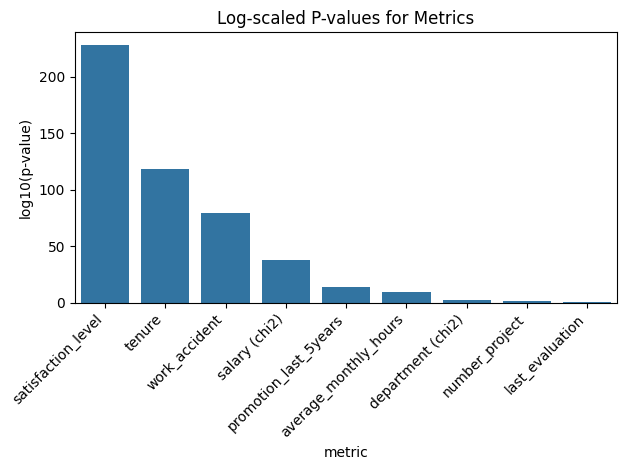

In [310]:
metrics_df['log_p_value'] = -np.log10(metrics_df['p_value'])

# Plot
sns.barplot(data=metrics_df, x='metric', y='log_p_value')
plt.xticks(rotation=45, ha='right')
plt.ylabel('log10(p-value)')
plt.title('Log-scaled P-values for Metrics')
plt.tight_layout()
plt.show()

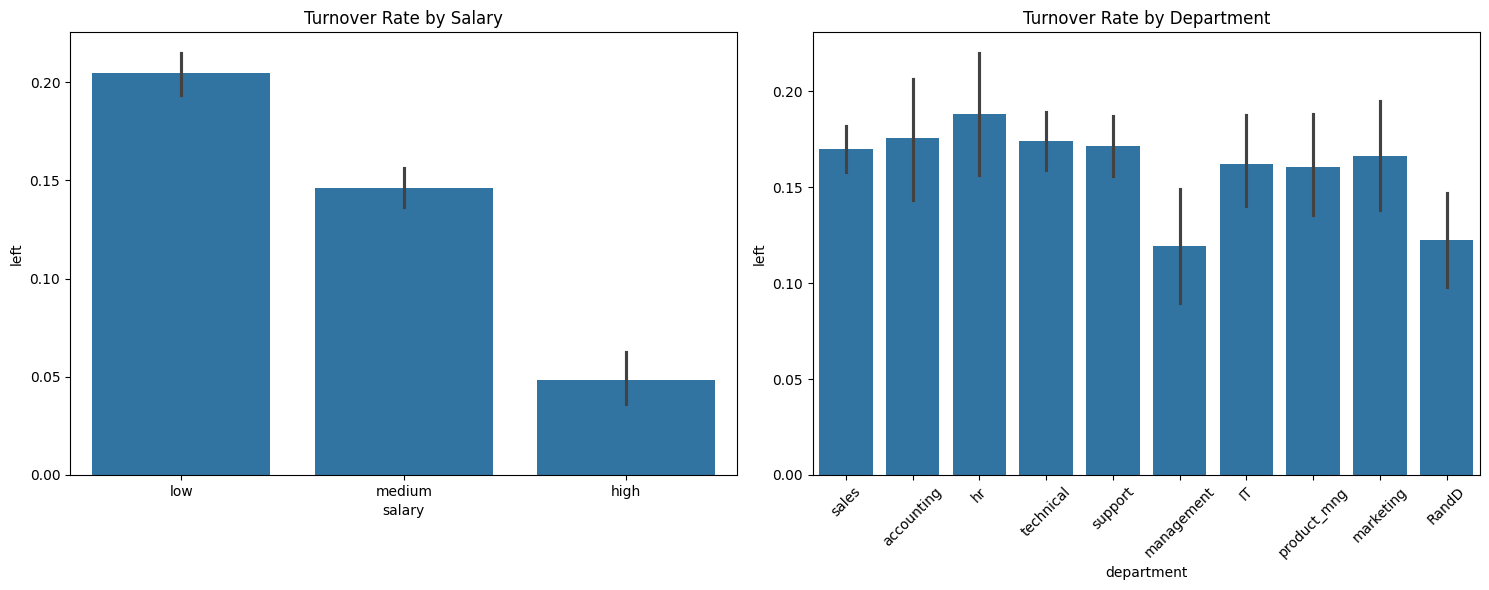

In [311]:
# Resignation rate by salary
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(x='salary', y='left', data=df, ax=ax[0])
ax[0].set_title("Turnover Rate by Salary")

# Resignation rate by department
sns.barplot(x='department', y='left', data=df, ax=ax[1])
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title("Turnover Rate by Department")

plt.tight_layout()
plt.show()

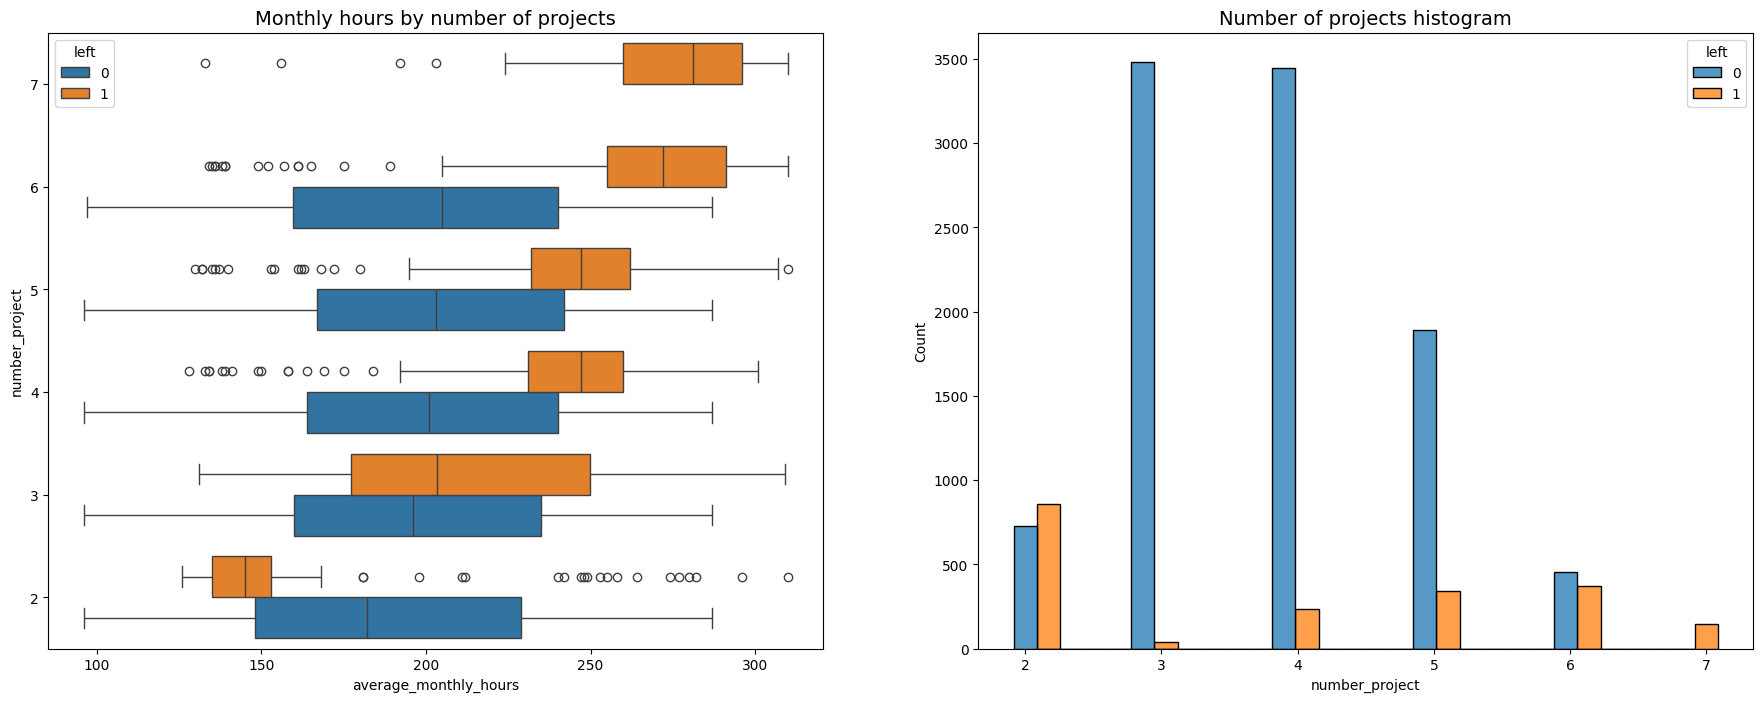

In [312]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

Normal working hours per month:

* `50 weeks * 40 hours per week / 12 months = 166.67 hours per month`

Text(0.5, 1.0, 'Salary histogram by tenure: long-tenured people')

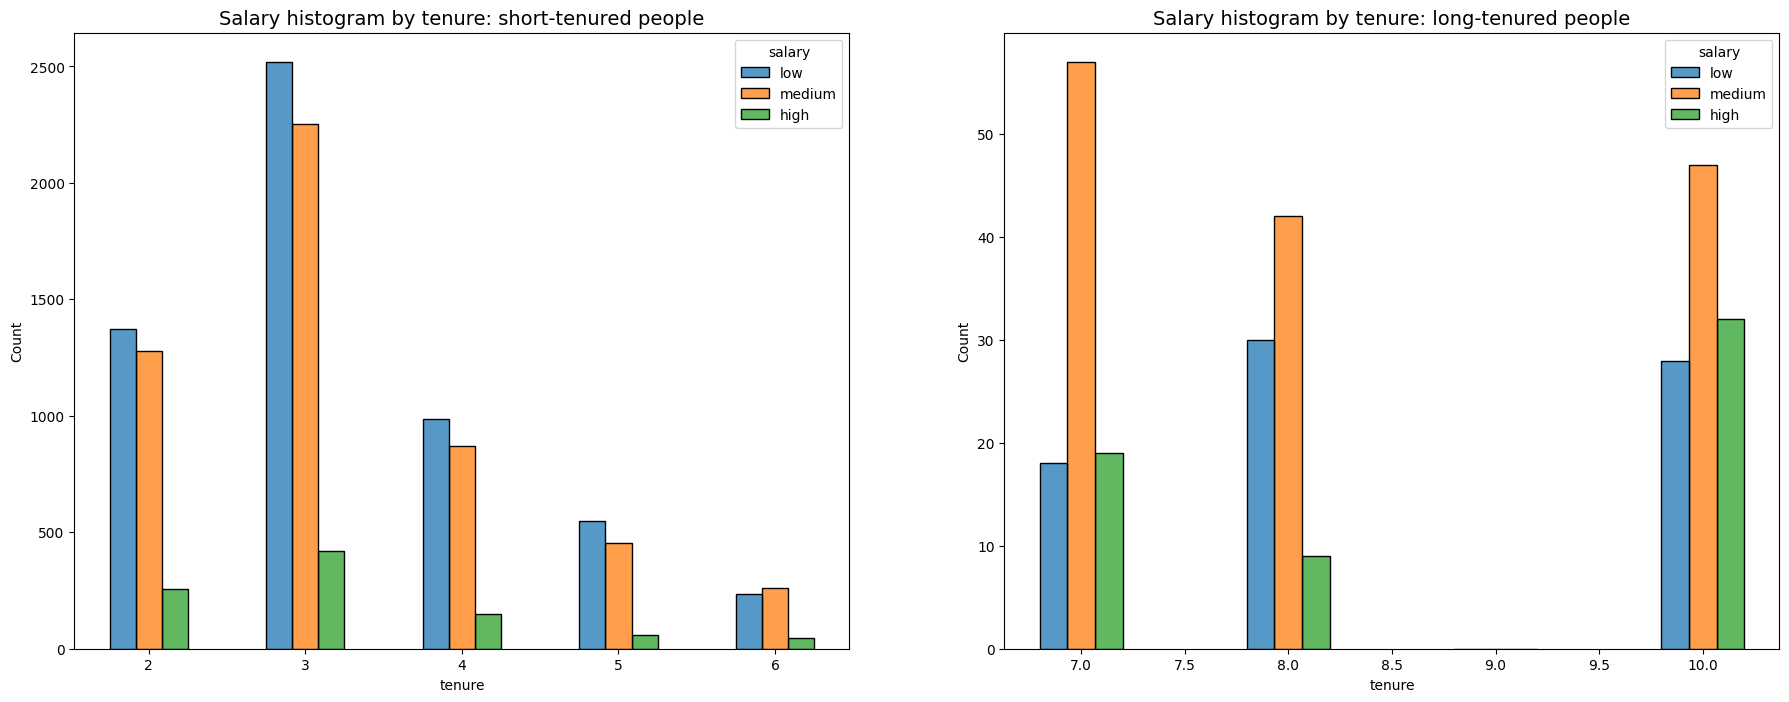

In [313]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df[df['tenure'] < 7]

# Define long-tenured employees
tenure_long = df[df['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')

### Check outliers

Check for outliers in the data.

In [314]:
# Take only numerical metrics
metrics = df.select_dtypes(include='number').columns

# Take off binary metrics from numerical metrics
metrics_non_binary = [col for col in metrics if df[col].nunique() > 2]

for metric in metrics_non_binary:
# Determine the number of rows containing outliers
    perc75 = df[metric].quantile(0.75)
    perc25 = df[metric].quantile(0.25)
    iqr = perc75 - perc25
    upper_limit = perc75 + 1.5 * iqr
    lower_limit = perc25 - 1.5 * iqr
    outliers =  df[(df[metric] > upper_limit) |  (df[metric] < lower_limit)]
    print(f"\nMetric: {metric}")
    print("Lower limit:", lower_limit)
    print("Upper limit:", upper_limit)
    print(f"Number of outliers in {metric}: {len(outliers)}")


Metric: satisfaction_level
Lower limit: -0.030000000000000027
Upper limit: 1.33
Number of outliers in satisfaction_level: 0

Metric: last_evaluation
Lower limit: 0.1349999999999999
Upper limit: 1.295
Number of outliers in last_evaluation: 0

Metric: number_project
Lower limit: 0.0
Upper limit: 8.0
Number of outliers in number_project: 0

Metric: average_monthly_hours
Lower limit: 28.0
Upper limit: 372.0
Number of outliers in average_monthly_hours: 0

Metric: tenure
Lower limit: 1.5
Upper limit: 5.5
Number of outliers in tenure: 824


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)

### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [315]:
# Get numbers of people who left vs. stayed
status_mapping = {
    0:'Stayed',
    1:'Left'
}

print("\nNumber of People Who Left vs. Stayed:")
print(df['left'].map(status_mapping).value_counts().astype(str))


# Get percentages of people who left vs. stayed
print("\nPercentage of People Who Left vs. Stayed:")
print(df['left'].map(status_mapping).value_counts(normalize=True).round(2).astype(str)+"%")



Number of People Who Left vs. Stayed:
left
Stayed    10000
Left       1991
Name: count, dtype: object

Percentage of People Who Left vs. Stayed:
left
Stayed    0.83%
Left      0.17%
Name: proportion, dtype: object


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 0, 'Satisfaction Level')

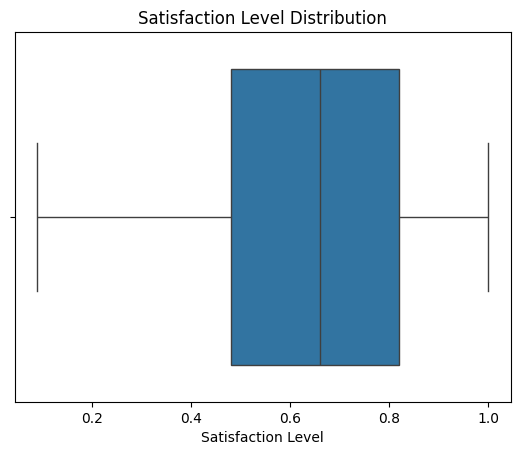

In [316]:
# Create a plot as needed
sns.boxplot(x=df['satisfaction_level'])
plt.title('Satisfaction Level Distribution')
plt.xlabel('Satisfaction Level')

Text(0.5, 0, 'Average Monthly Hours')

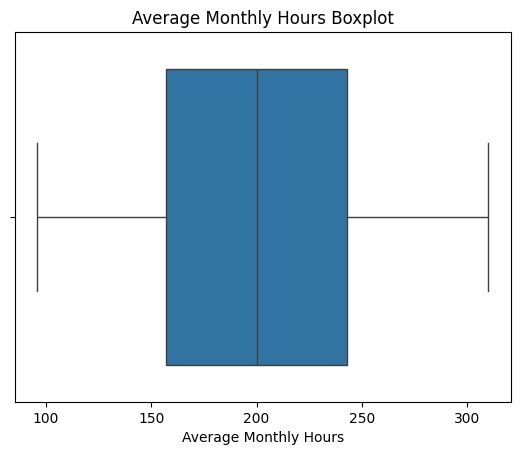

In [317]:
# Create a plot as needed
sns.boxplot(x=df['average_monthly_hours'])
plt.title('Average Monthly Hours Boxplot')
plt.xlabel('Average Monthly Hours')

Text(0.5, 0, 'Tenure (years)')

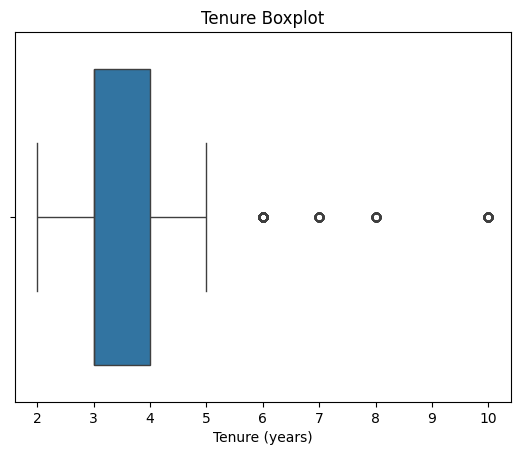

In [318]:
# Create a plot as needed
sns.boxplot(x=df['tenure'])
plt.title('Tenure Boxplot')
plt.xlabel('Tenure (years)')

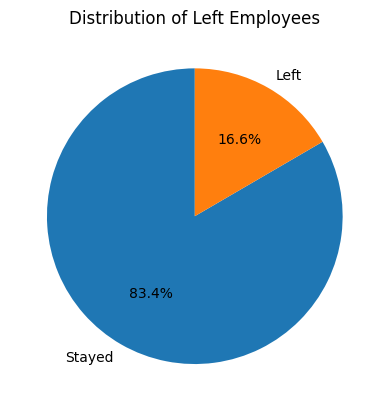

In [319]:
# Create a plot as needed
counts = df['left'].value_counts()
labels = ['Stayed', 'Left']

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Left Employees')
plt.show()

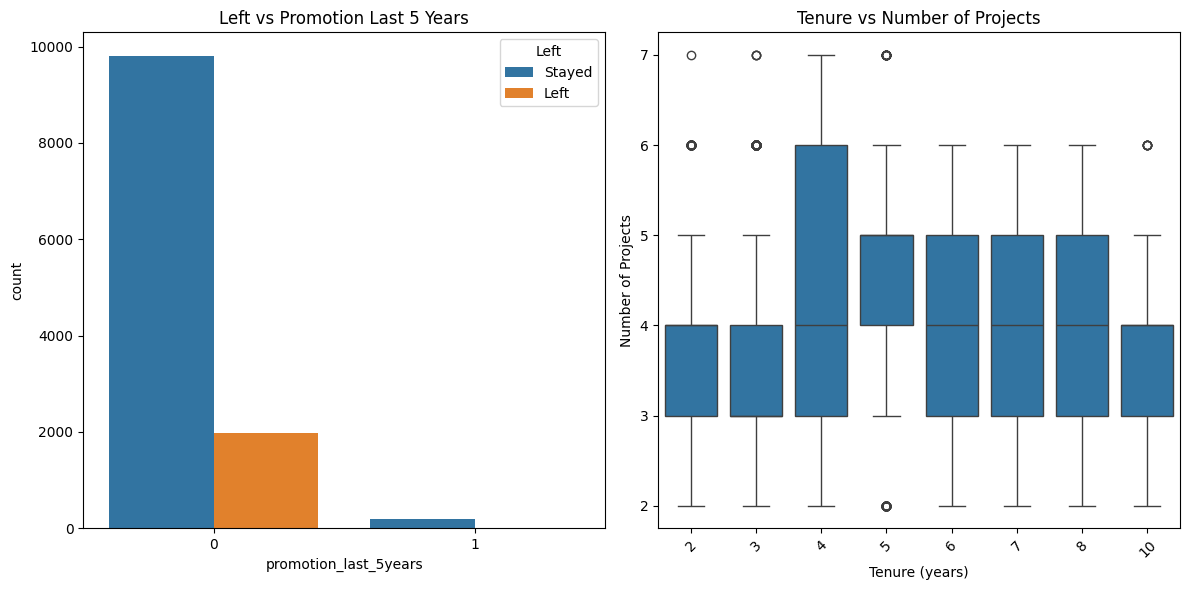

In [320]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.countplot(data=df, x='promotion_last_5years', hue='left', ax=ax[0])
ax[0].set_title('Left vs Promotion Last 5 Years')
ax[0].legend(title='Left', labels=['Stayed', 'Left'])



sns.boxplot(data=df, x='tenure', y='number_project', ax=ax[1])
ax[1].set_title('Tenure vs Number of Projects')
ax[1].set_xlabel('Tenure (years)')
ax[1].set_ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.tight_layout()

In [321]:
# Get numbers of people who left vs. stayed
status_mapping = {
    0:'Not promoted',
    1:'Promoted'
}

print("\nNumber of People Promoted vs Not Promoted:")
print(df['promotion_last_5years'].map(status_mapping).value_counts().to_string())


# Get percentages of people who left vs. stayed
print("\nPercentage of People Promoted vs Not Promoted:")
print(df['promotion_last_5years'].map(status_mapping).value_counts(normalize=True).round(2).astype(str)+"%")



Number of People Promoted vs Not Promoted:
promotion_last_5years
Not promoted    11788
Promoted          203

Percentage of People Promoted vs Not Promoted:
promotion_last_5years
Not promoted    0.98%
Promoted        0.02%
Name: proportion, dtype: object


Text(0.5, 1.0, 'Distribution of Employees by Department')

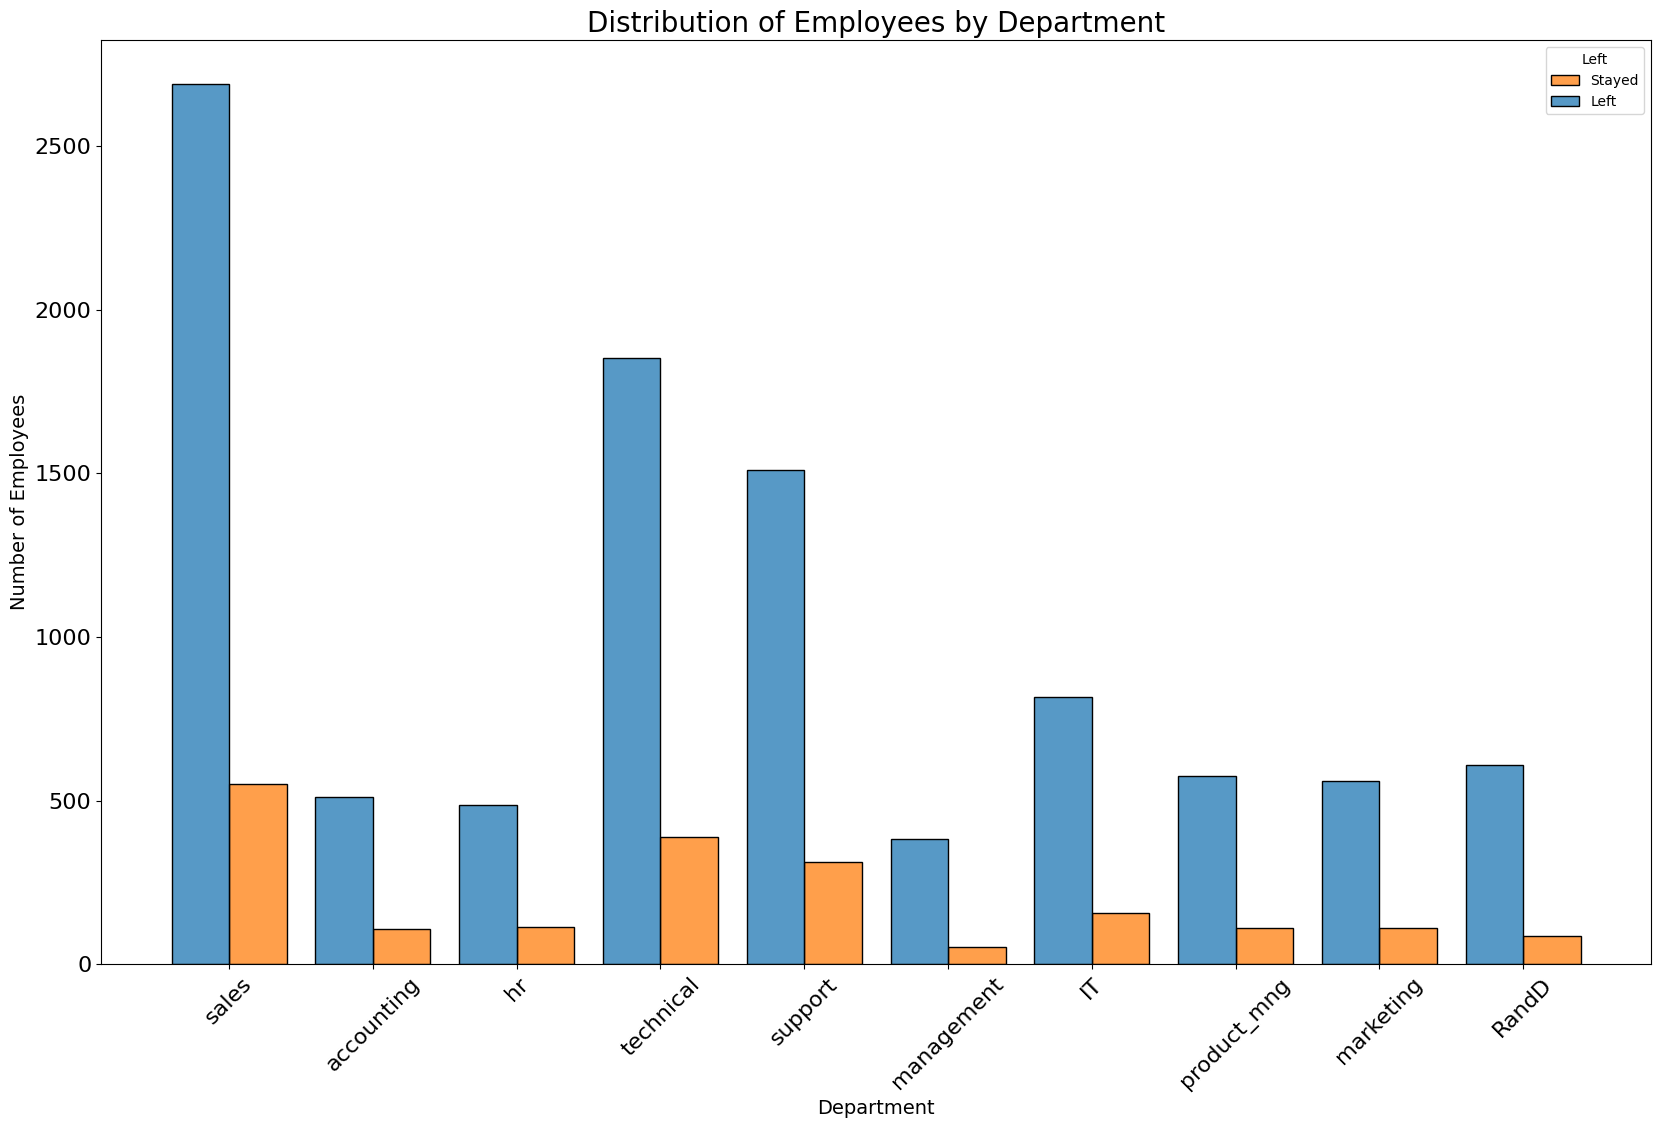

In [322]:
# Create a plot as needed
plt.figure(figsize=(20,12))
sns.histplot(data = df, x = 'department', hue = 'left', multiple = 'dodge', shrink = 0.8)
plt.xlabel('Department', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.ylabel('Number of Employees', fontsize=14)
plt.xticks(rotation=45)
plt.title('Distribution of Employees by Department', fontsize=20)

In [323]:
# Create a plot as needed
df['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

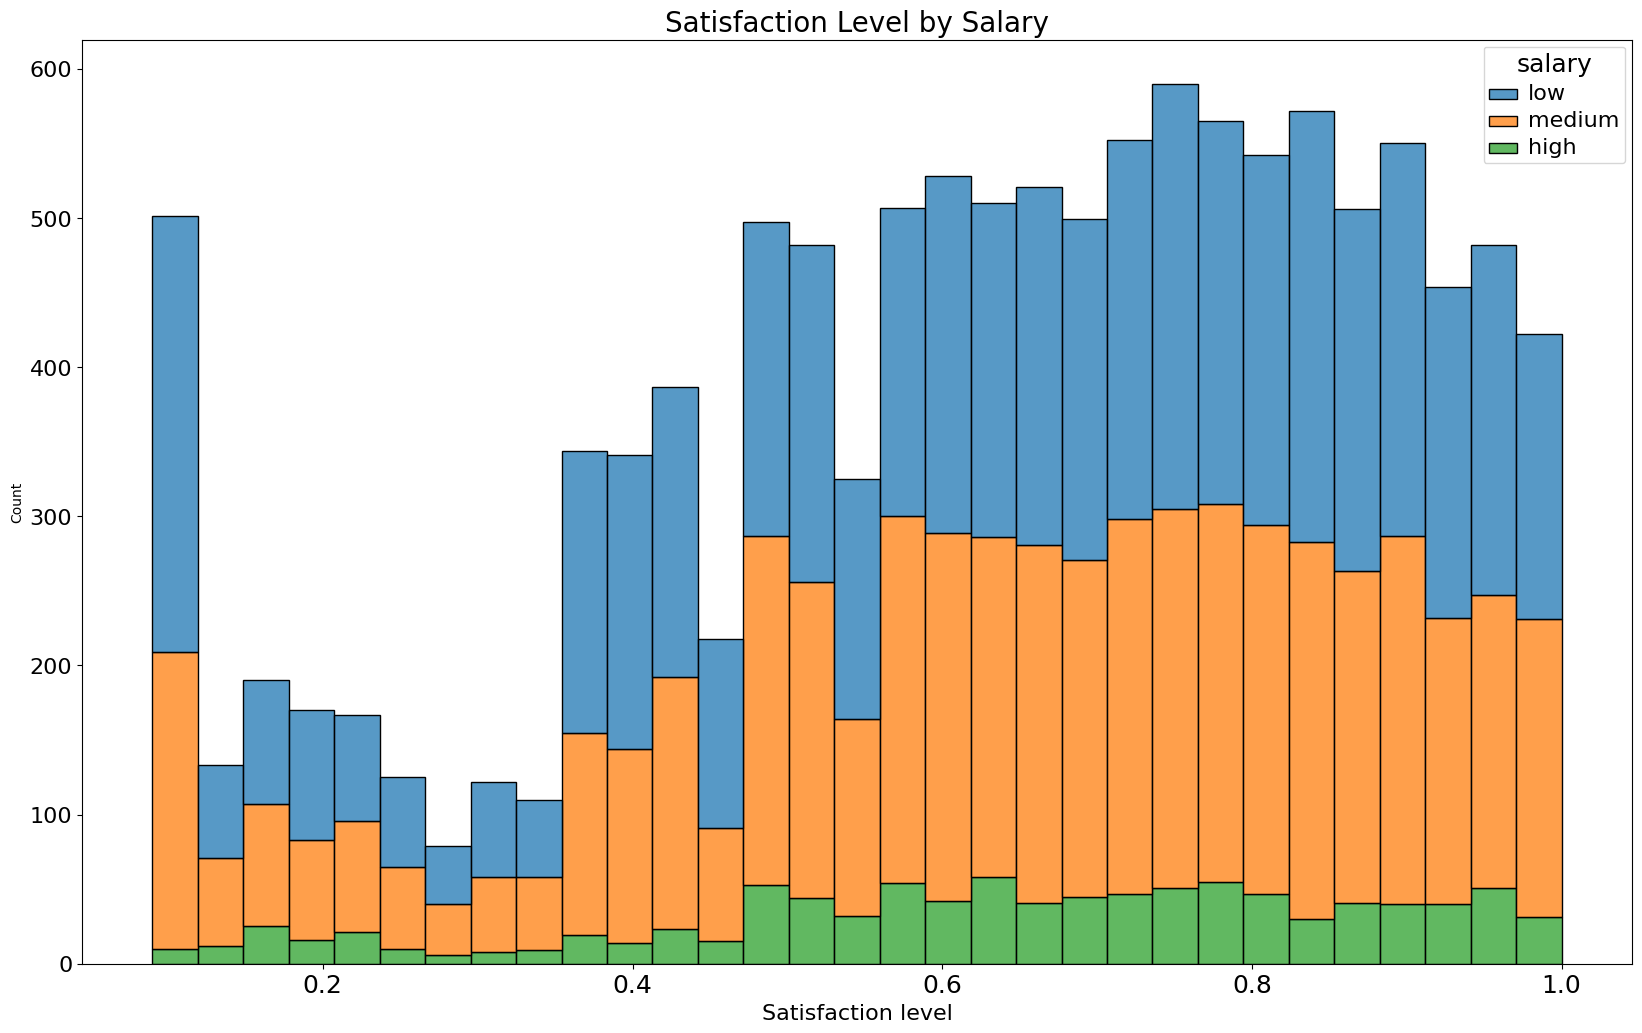

In [324]:
plt.figure(figsize=(20,12))
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.xlabel('Satisfaction level', fontsize=16)
sns.histplot(x ='satisfaction_level', hue = 'salary', multiple='stack', data=df)
plt.title('Satisfaction Level by Salary', fontsize=20)
legend = plt.gca().get_legend()
legend.get_title().set_fontsize(18)
for text in legend.get_texts():
    text.set_fontsize(16) 

In [325]:
df['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

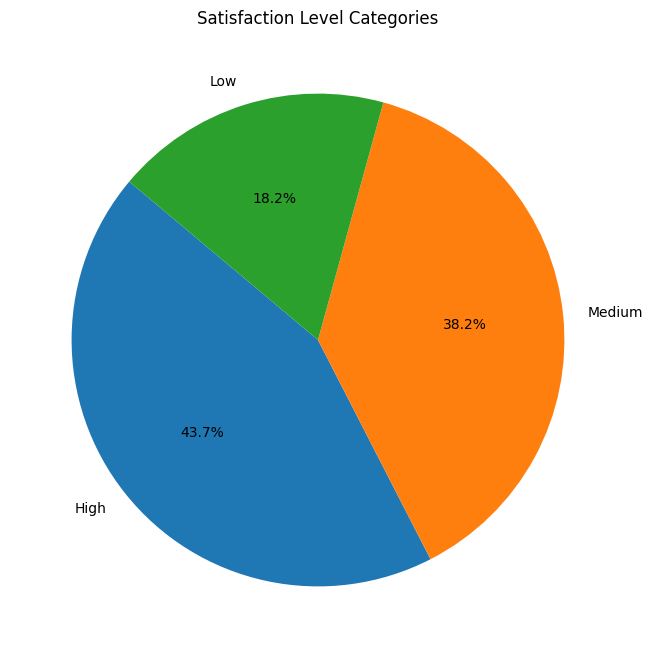

In [326]:
df_sat_cat = df.copy()
df_sat_cat['satisfaction_cat'] = pd.cut(
    df['satisfaction_level'],
    bins=[0, 0.4, 0.7, 1.0],
    labels=['Low', 'Medium', 'High']
)
# - pd.cut() → This function bins the values into predefined ranges
# - bins=[0, 0.4, 0.7, 1.0] → Defines the intervals
# - 0 to 0.4 → Assigned to 'Low'.
# - 0.4 to 0.7 → Assigned to 'Medium'.
# - 0.7 to 1.0 → Assigned to 'High'.

satisfaction_counts = df_sat_cat['satisfaction_cat'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Satisfaction Level Categories')
plt.show()


Text(0, 0.5, 'Number of Employees')

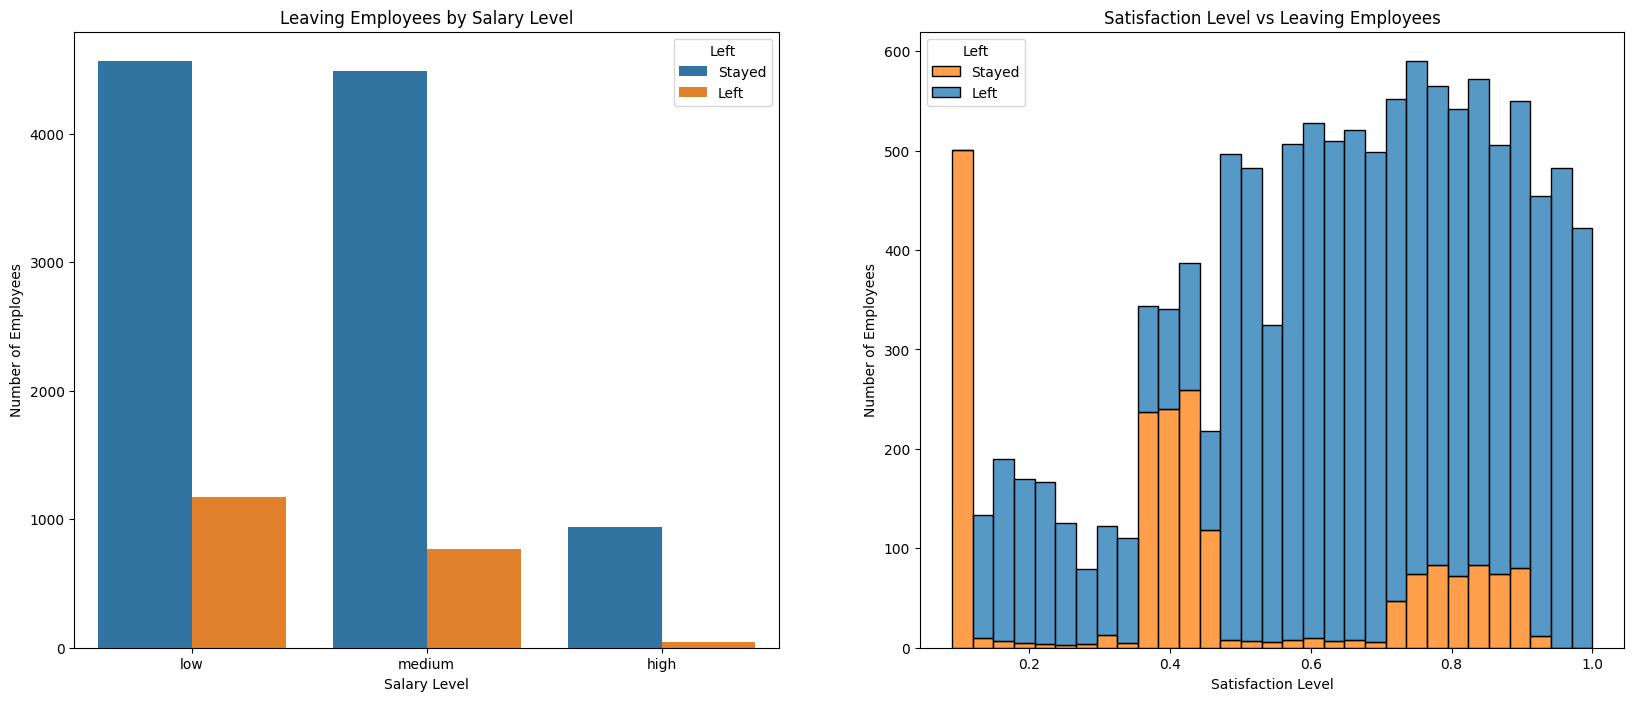

In [327]:
fig, ax  = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(data=df, x='salary', hue='left', ax=ax[0])
ax[0].set_title('Leaving Employees by Salary Level')
ax[0].legend(title='Left', labels=['Stayed', 'Left'])
ax[0].set_xlabel('Salary Level')
ax[0].set_ylabel('Number of Employees')

sns.histplot(data=df, x='satisfaction_level', hue='left', multiple='stack', ax=ax[1])
ax[1].set_title('Satisfaction Level vs Leaving Employees')
ax[1].legend(title='Left', labels=['Stayed', 'Left'])
ax[1].set_xlabel('Satisfaction Level')
ax[1].set_ylabel('Number of Employees') 

Text(0.5, 1.0, 'Average Monthly Hours vs Satisfaction Level')

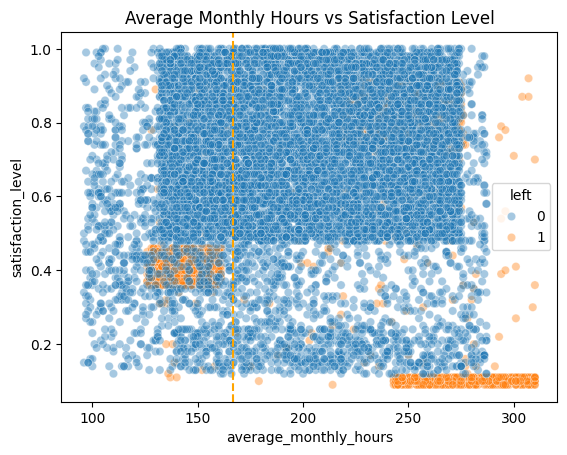

In [328]:
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='orange', label='166.67 hrs./mo.', ls='--')
plt.title('Average Monthly Hours vs Satisfaction Level')

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

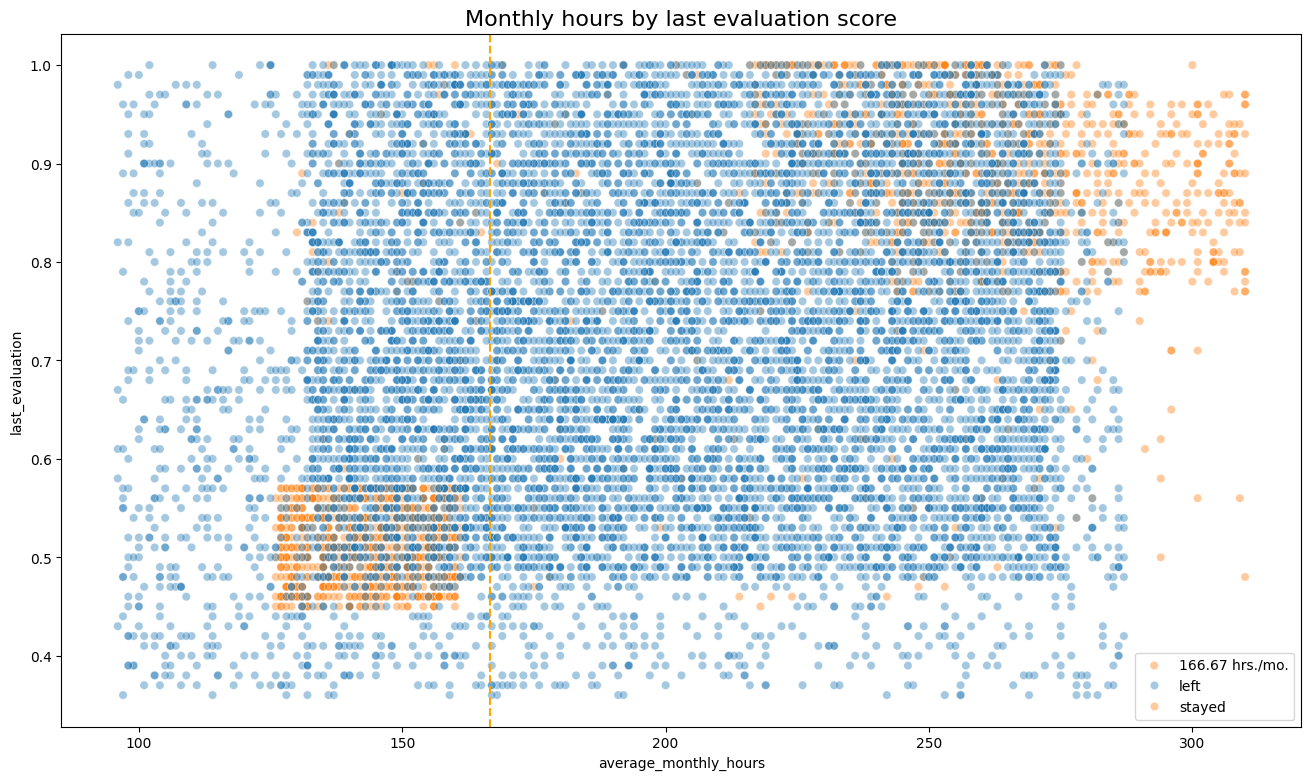

In [329]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='orange', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='16')

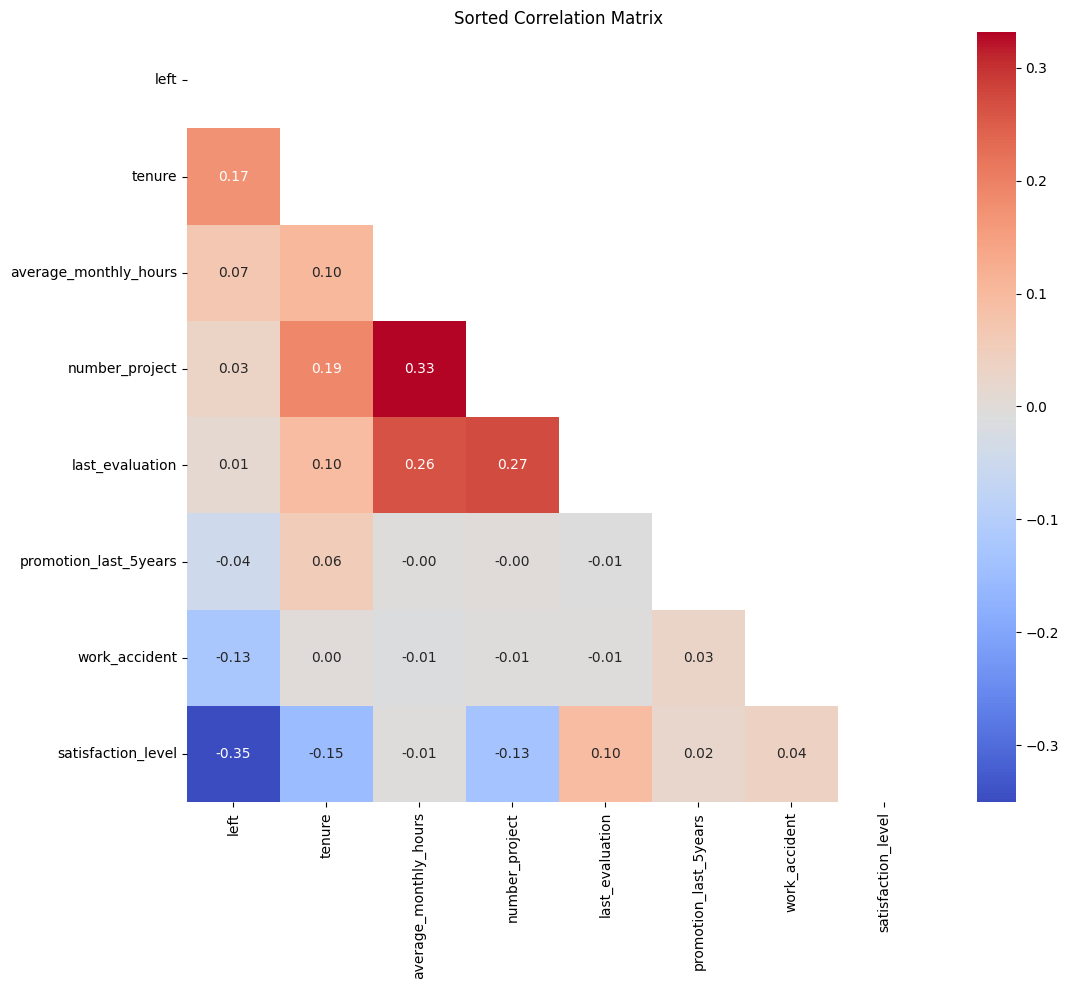

In [330]:
df_corr = df.select_dtypes(include='number') 
corr = df_corr.corr()
corr_target_sorted = corr.sort_values(by='left', ascending=False)

# Reorder rows and columns
ordered_corr = corr.loc[corr_target_sorted.index, corr_target_sorted.index]

# Plot with mask
mask = np.triu(np.ones_like(ordered_corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(ordered_corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Sorted Correlation Matrix')
plt.show()


**Strongest correlation** with `left`:

| Feature                 | Corr with `left` | Interpretation                                                                             |
| ----------------------- | ---------------- | ------------------------------------------------------------------------------------------ |
| `satisfaction_level`    | **-0.35**        | Strong **negative** correlation. **Low satisfaction** → more likely to leave.              |
| `tenure`                | +0.17            | Slight **positive** correlation. **More years** → slightly more likely to leave.           |
| `work_accident`         | -0.13            | Weak **negative** correlation. Having had an accident → **slightly less likely to leave**. |
| `promotion_last_5years` | -0.04            | Negligible impact. No real trend.                                                          |

**What’s weak or limited:**

**1.** Low correlations across the board
   * Besides **left** (-0.35), all other variables have very low correlation with **satisfaction** (close to 0).

   * This means satisfaction is mostly unaccounted for by these internal metrics.

   * Could be due to:

       * Unmeasured variables (e.g. team culture, management style, stress, recognition)

       * Noise in how satisfaction was recorded or defined
        

**2.** Satisfaction is hard to explain with current features

* Even with regression, only last_evaluation has a notable coefficient.

* The R²  will probably be very low, meaning the model barely explains satisfaction.


* **Good** enough for predictive modeling of attrition (left)

* **Weak** for explaining satisfaction, which may rely on qualitative/external factors

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

#### 1. Identify the type of prediction task.

#### 2. Identify the types of models most appropriate for this task.

### Modeling 

#### To prepare data for Logistic Regression, Decision Tree and Random Forest

Add as many cells as you need to conduct the modeling process.

In [331]:
# Copy the dataframe
df_enc = df.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
1       6              0     1                      0       1          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

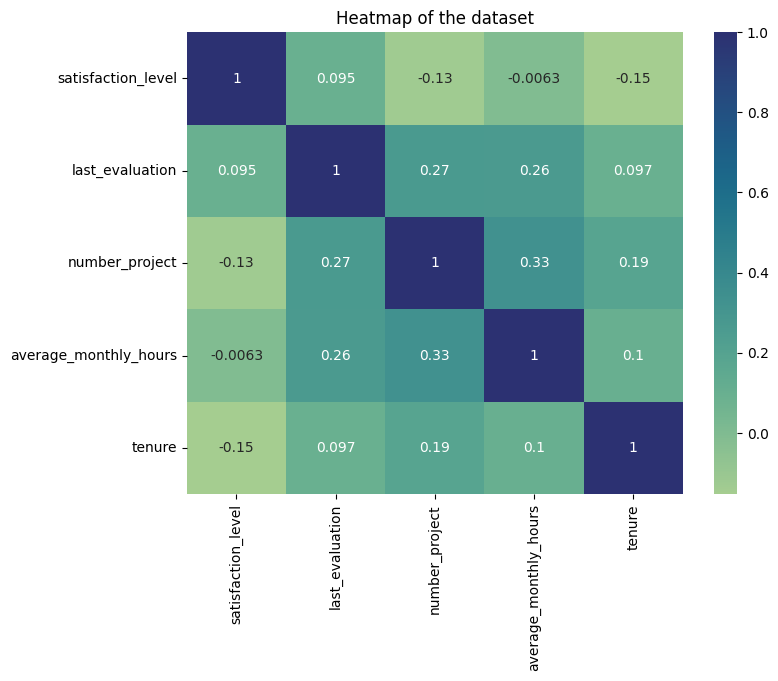

In [332]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

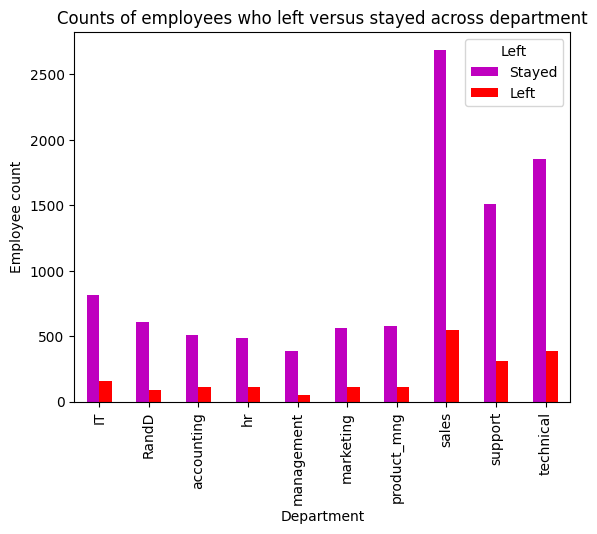

In [333]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
pd.crosstab(df['department'], df['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [334]:
# Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `tenure` column that were identified earlier.

df_log_reg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
# Create a new dataframe with only numeric columns']

df_log_reg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   
5       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

In [335]:
y = df_log_reg['left']
X = df_log_reg.drop(columns=['left'], axis=1)

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic regression

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

In [337]:
# the classifier object (clf) has attributes like .coef_ and .intercept_, which store the learned coefficients and intercept.
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [338]:
# y = predictive value, x = features
y_pred = log_clf.predict(X_test)

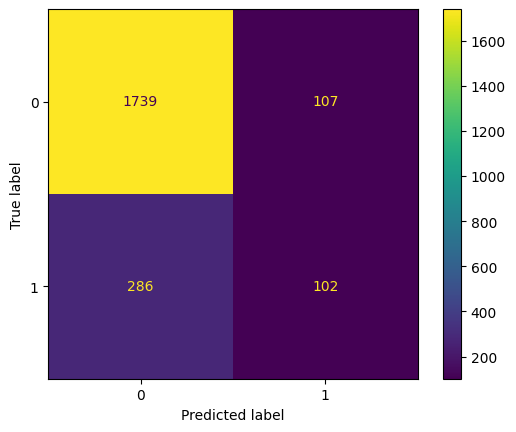

In [339]:
# Compute the Confusion Matrix
log_cm = confusion_matrix(y_test, y_pred)

# Compute Display for conbfusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = log_clf.classes_)

# Plot the confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [340]:
# Compute Classification Report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      1846
    Predicted would leave       0.49      0.26      0.34       388

                 accuracy                           0.82      2234
                macro avg       0.67      0.60      0.62      2234
             weighted avg       0.79      0.82      0.80      2234



## Tree-based Model

In [341]:
y = df_enc['left']
X = df_enc.drop('left', axis=1)

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision Tree

In [343]:
tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4, 6, 8, None],
            'min_samples_leaf': [2, 5, 1],
            'min_samples_split': [2, 4, 6]
            }


scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [344]:
tree1.fit(X_train, y_train)


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [345]:
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [346]:
# Best AUC score
tree1.best_score_

np.float64(0.969819392792457)

In [347]:
# Take out all the scores from the grid search
def make_results(model_name:str, model_object, metric:str):

    metric_dict = {'auc': 'mean_test_roc_auc',
                   'accuracy': 'mean_test_accuracy',
                   'precision': 'mean_test_precision',
                   'recall': 'mean__test_recall',
                   'f1': 'mean_test_f1'}
    
    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    
    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [348]:
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

All of these scores from the decision tree model are strong indicators of good model performance. 

### Random Forest

In [349]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}
# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc', n_jobs=-1)

In [350]:
%%time
# rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: total: 0 ns
Wall time: 0 ns


In [351]:
# Define a path to the folder where you want to save the model
path = r"C:\Users\barba\OneDrive - University College London\Bioinformatics\Coursera\Google Advanced Data Analytics Professional Certificate\Project"

In [352]:
def write_pickle(base_path, model_object, save_as:str):
    full_path = os.path.join(base_path, save_as + '.pickle')
    print(f"Attempting to save pickle to: {full_path}") # Add this for debugging
    with open(full_path, 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [353]:
def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [354]:
# Write pickle
# write_pickle(path, rf1, 'hr_rf1')

In [355]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [356]:
# Check best AUC score on CV
rf1.best_score_

np.float64(0.9804250949807172)

In [357]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [358]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


In [359]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [360]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

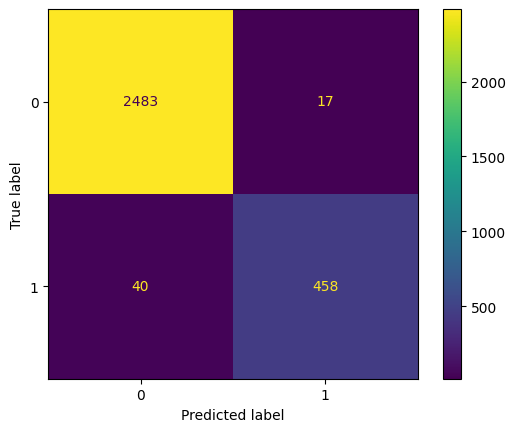

In [361]:
# Generate array of values for confusion matrix
preds_rf1 = rf1.best_estimator_.predict(X_test)
cm_rf1 = confusion_matrix(y_test, preds_rf1, labels=rf1.classes_)

# Plot confusion matrix
disp_rf1 = ConfusionMatrixDisplay(confusion_matrix=cm_rf1,
                             display_labels=rf1.classes_)
disp_rf1.plot(values_format='')

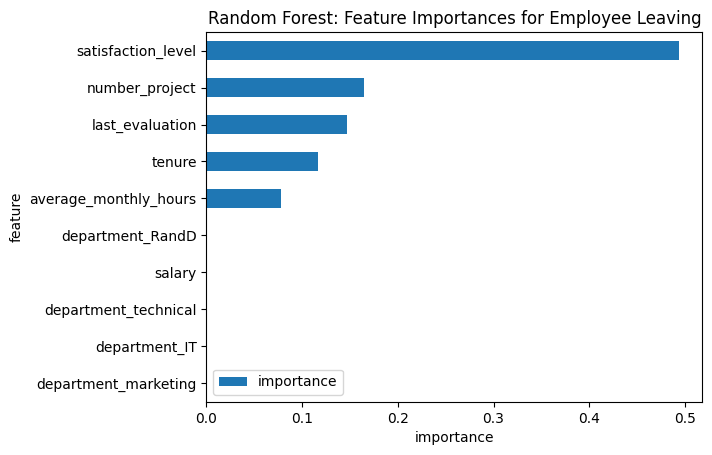

In [362]:

# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df1 = pd.DataFrame({"feature":feat,"importance":feat_impt})
y_sort_df1 = y_df1.sort_values("importance")

# Plot the feature importances
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df1.plot(kind='barh',ax=ax1,x="feature",y="importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("feature")
ax1.set_xlabel("importance")

plt.show()

#### Guessings on evaluated features

These high evaluation scores are unusual. There is a chance that there is some data misinterpretation that coudl lead to unmeaningful results.

It's likely that the company dooes not report satisfaction levels for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data badly sampled. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours. 

It is reasonable to drop `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. This new feature can be called `overworked`. It will be a binary variable.

In [363]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

It is possible to being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, you could reassign the column using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175

In [364]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [365]:
df2 = df2.drop('average_monthly_hours', axis=1)

#### Select again features anf target variables

In [366]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [367]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - columns adjusted based on previous results

In [368]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}
# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [369]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 2.8 s
Wall time: 2.81 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [370]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [371]:
# Check best AUC score on CV
tree2.best_score_

np.float64(0.9586752505340426)

In [372]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


In [373]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}
# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [374]:
%%time
# rf2.fit(X_train, y_train) # --> Wall time: 7min 5s

CPU times: total: 0 ns
Wall time: 0 ns


In [375]:
# Write pickle
# write_pickle(path, rf2, 'hr_rf2')

In [376]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [377]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [378]:
# Check best AUC score on CV
rf2.best_score_

np.float64(0.9648100662833985)

In [379]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


In [380]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall      f1  accuracy       AUC
0  random forest2 test   0.870406  0.903614  0.8867  0.961641  0.938407

#### Confusion Matrix

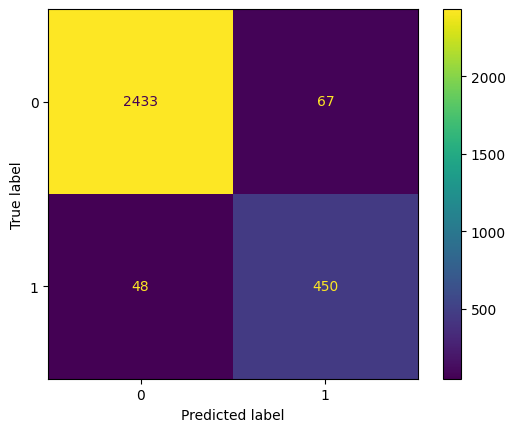

In [381]:
# Generate array of values for confusion matrix
preds_rf2 = rf2.best_estimator_.predict(X_test)
cm_rf2 = confusion_matrix(y_test, preds_rf2, labels=rf2.classes_)

# Plot confusion matrix
disp_rf2 = ConfusionMatrixDisplay(confusion_matrix=cm_rf2,
                             display_labels=rf2.classes_)
disp_rf2.plot(values_format='')

#### Decision Tree Splits

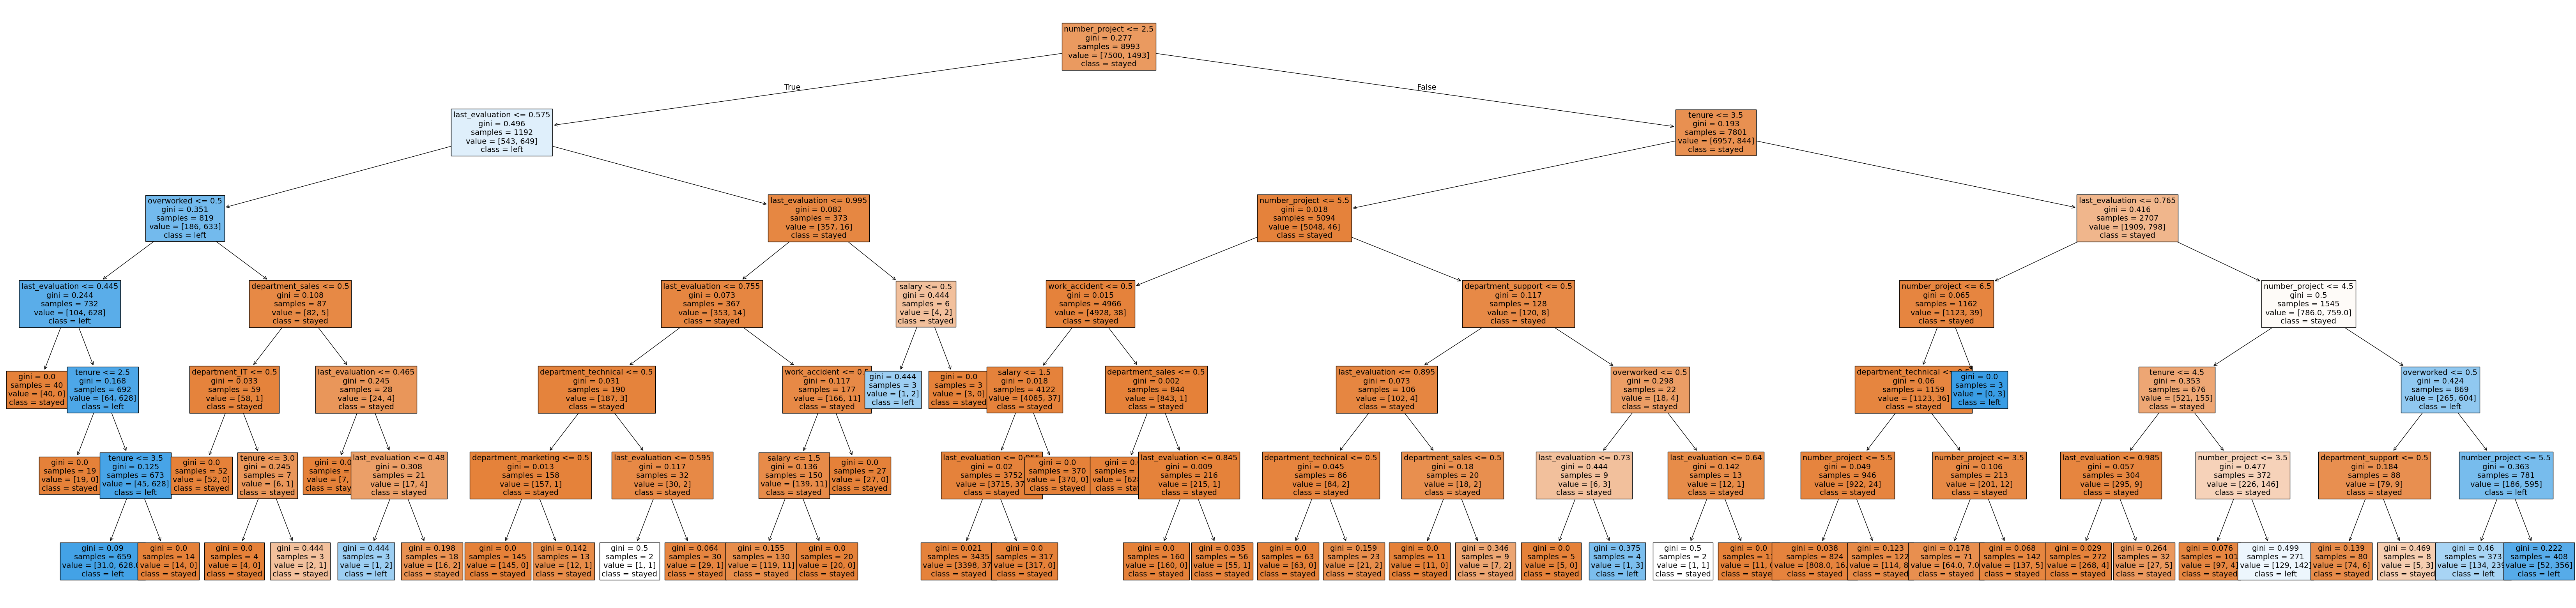

In [382]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True)
plt.show()

#### Decision tree feature importance

**Gini importance (also known as Mean Decrease in Impurity)** is a metric used in decision trees and random forests to measure the importance of each feature in making predictions. It is based on the Gini impurity, which quantifies how mixed the classes are within a node.

How It Works:
- When a feature is used to split a node, it reduces the Gini impurity (i.e., makes the groups more homogeneous).
- The total reduction in impurity across all splits where a feature is used is summed up to compute its Gini importance.
- Features with higher **Gini importance** contribute more to the model's decision-making.


In [383]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances


gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

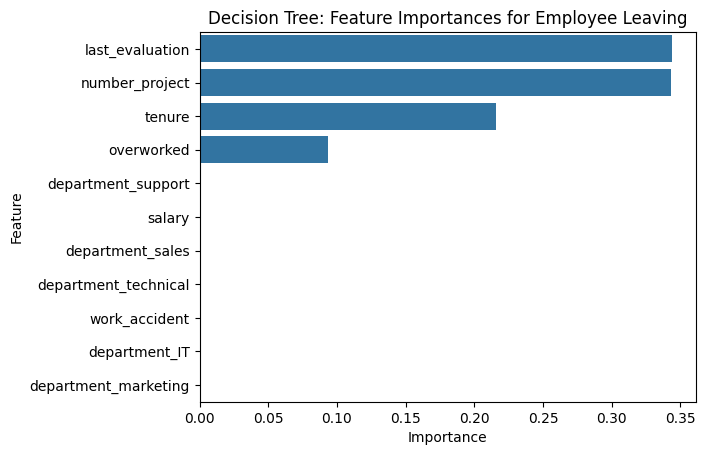

In [384]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

#### Random forest feature importance

Now, plotting the feature importances for the random forest model.

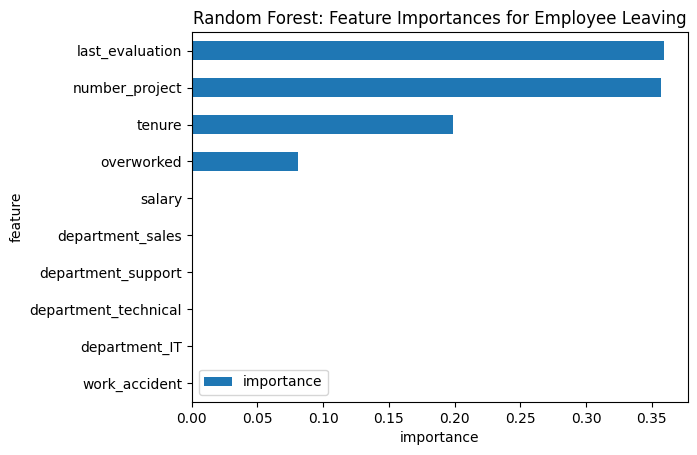

In [385]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df2 = pd.DataFrame({"feature":feat,"importance":feat_impt})
y_sort_df2 = y_df2.sort_values("importance")

# Plot the feature importances
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df2.plot(kind='barh',ax=ax1,x="feature",y="importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("feature")
ax1.set_xlabel("importance")

plt.show()

In [386]:
y_sort_df2

feature  importance
0         work_accident    0.000276
1         department_IT    0.000291
2  department_technical    0.000414
3    department_support    0.000578
4      department_sales    0.000612
5                salary    0.000644
6            overworked    0.080984
7                tenure    0.199109
8        number_project    0.356801
9       last_evaluation    0.359494

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



In [387]:
# True labels
y_true = [0, 0, 1, 1]

# Predicted probabilities
y_scores = [0.1, 0.4, 0.35, 0.8]

# Compute AUC
auc_score = roc_auc_score(y_true, y_scores)
print(f"AUC Score: {auc_score:.2f}")

AUC Score: 0.75


In [388]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

### XGBoost Model 1

In [389]:
# Isolate the outcome variable
# df2.copy
y = df_enc['left']
X = df_enc.drop('left', axis=1)

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [391]:
# Fit the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

cv_params_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 300, 500],
    'subsample': [0.7, 0.8, 1.0],         # Fraction of samples used for fitting the individual base learners
    'colsample_bytree': [0.7, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],               # Minimum loss reduction required to make a further partition
    'lambda': [1, 1.5, 2],                # L2 regularization term on weights
    'alpha': [0, 0.1, 0.5]                # L1 regularization term on weights
}
# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
} 

# Set up the GridSearchCV
xgb_model1 = GridSearchCV(
    estimator=xgb_model,
    param_grid=cv_params_xgb,
    scoring=scoring,
    cv=4,
    refit='roc_auc',
    verbose=1,  # optional, for more info
    n_jobs=-1 # to leverage all CPU cores.
)

In [392]:
%%time
# xgb_model1.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


In [393]:
# Write pickle
# write_pickle(path, xgb_model1, 'hr_xgb_model1')

In [394]:
xgb_model1 = read_pickle(path, 'hr_xgb_model1')

In [395]:
# Check best AUC score on CV
xgb_model1.best_params_

{'alpha': 0,
 'colsample_bytree': 1.0,
 'gamma': 0.1,
 'lambda': 2,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.8}

In [396]:
# Check best AUC score on CV
xgb_model1.best_score_

np.float64(0.9862188441742771)

In [397]:
# Get all CV scores
xgb_model1_cv_results = make_results('xgb_model1', xgb_model1, 'auc')
print(rf1_cv_results)
print(rf2_cv_results)
print(xgb_model1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481
        model  precision    recall        F1  accuracy       auc
0  xgb_model1   0.975793  0.916281  0.945066   0.98232  0.986219


In [398]:
# Get predictions on test data
xgb_model1_test_scores = get_scores('xgb model1', xgb_model1, X_test, y_test)
xgb_model1_test_scores

model  precision    recall        f1  accuracy       AUC
0  xgb model1   0.978541  0.915663  0.946058  0.982655  0.955831

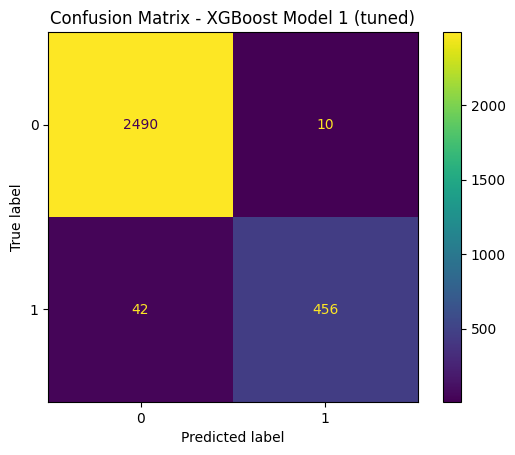

In [399]:
# Generate array of values for confusion matrix
preds_xgb1 = xgb_model1.best_estimator_.predict(X_test)
cm_xgb1 = confusion_matrix(y_test, preds_xgb1, labels=xgb_model1.classes_)

# Plot confusion matrix
disp_xgb1 = ConfusionMatrixDisplay(confusion_matrix=cm_xgb1,
                             display_labels=xgb_model1.classes_)
disp_xgb1.plot(values_format='')

plt.title('Confusion Matrix - XGBoost Model 1 (tuned)')
plt.show()

In [400]:

importance = xgb_model1.best_estimator_.get_booster().get_score(importance_type='gain')

# Convert to DataFrame for easier sorting
importance_df1 = pd.DataFrame({
    'feature': list(importance.keys()),
    'importance': list(importance.values())
}).sort_values(by='importance', ascending=False)

print(importance_df1)

                   feature  importance
0       satisfaction_level   45.783989
4                   tenure   36.121506
2           number_project   16.978743
1          last_evaluation   14.657480
3    average_monthly_hours    6.443074
5            work_accident    5.077404
6                   salary    3.423650
11  department_product_mng    2.317812
13      department_support    2.220171
9    department_accounting    1.897828
14    department_technical    1.864844
7            department_IT    1.660149
12        department_sales    1.520898
8         department_RandD    1.387220
10    department_marketing    0.161139


C:\Users\barba\AppData\Local\Temp\ipykernel_19452\3870074669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df1, palette='viridis')


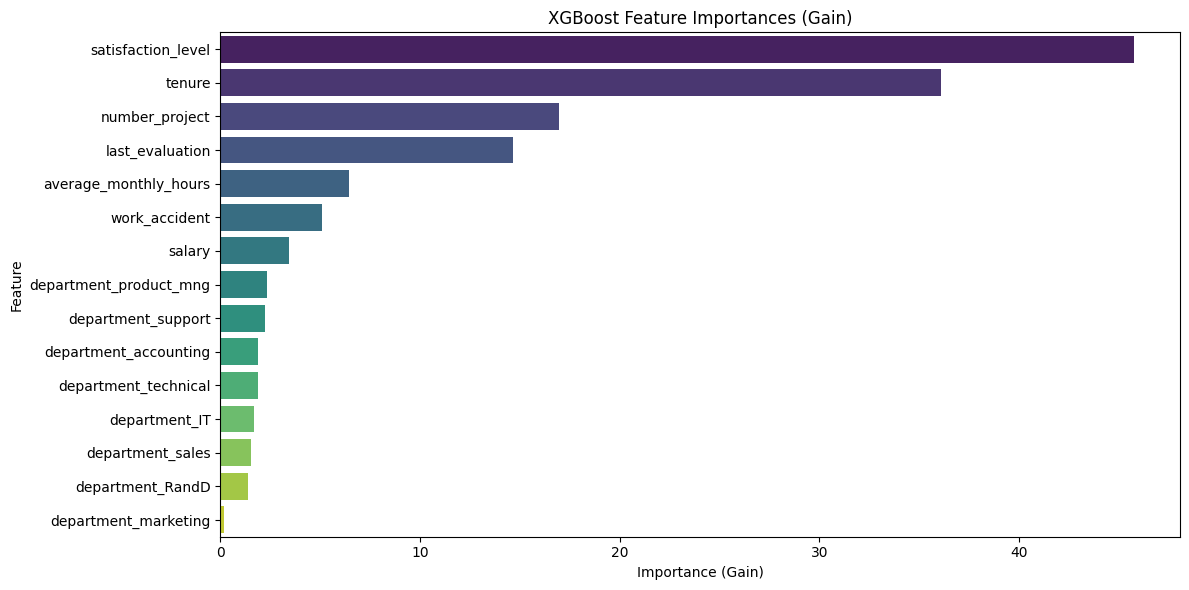

In [401]:
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=importance_df1, palette='viridis')
plt.title('XGBoost Feature Importances (Gain)')
plt.xlabel('Importance (Gain)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### XGBoost 2 - Random Forest 2 Dataset

In [402]:
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [404]:
# Fit the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
} 

# Set up the GridSearchCV
xgb_model2 = GridSearchCV(
    estimator=xgb_model,
    param_grid=cv_params_xgb,
    scoring=scoring,
    cv=4,
    refit='roc_auc',
    verbose=2,  # optional, for more info
    n_jobs=-1 # to leverage all CPU cores.
)

In [405]:
%%time
# xgb_model2.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


In [406]:
# Write pickle
# write_pickle(path, xgb_model2, 'hr_xgb_model2')


In [407]:
xgb_model2 = read_pickle(path, 'hr_xgb_model2')


In [408]:
# Check best AUC score on CV
xgb_model2.best_params_


{'alpha': 0,
 'colsample_bytree': 1.0,
 'gamma': 0.2,
 'lambda': 1,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 500,
 'subsample': 1.0}

In [409]:
# Check best AUC score on CV
xgb_model2.best_score_


np.float64(0.9734895786440338)

In [410]:
# Get all CV scores
xgb_model2_cv_results = make_results('xgb_model2', xgb_model2, 'auc')
print(rf1_cv_results)
print(rf2_cv_results)
print(xgb_model1_cv_results)
print(xgb_model2_cv_results)


              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481
        model  precision    recall        F1  accuracy       auc
0  xgb_model1   0.975793  0.916281  0.945066   0.98232  0.986219
        model  precision    recall        F1  accuracy      auc
0  xgb_model2   0.909276  0.892835  0.900966  0.967419  0.97349


In [411]:
# Get predictions on test data
xgb_model2_test_scores = get_scores('xgb model2', xgb_model2, X_test, y_test)
xgb_model2_test_scores


model  precision    recall        f1  accuracy       AUC
0  xgb model2   0.897384  0.895582  0.896482  0.965644  0.937591

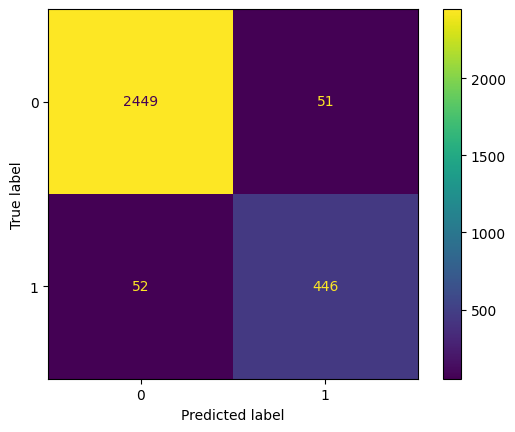

In [412]:
# Generate array of values for confusion matrix
preds_xgb2 = xgb_model2.best_estimator_.predict(X_test)
cm_xgb2 = confusion_matrix(y_test, preds_xgb2, labels=xgb_model2.classes_)

# Plot confusion matrix
disp_xgb2 = ConfusionMatrixDisplay(confusion_matrix=cm_xgb2,
                             display_labels=xgb_model2.classes_)
disp_xgb2.plot(values_format='')

In [413]:

importance2 = xgb_model2.best_estimator_.get_booster().get_score(importance_type='gain')

# Convert to DataFrame for easier sorting
importance_df2 = pd.DataFrame({
    'feature': list(importance2.keys()),
    'importance': list(importance2.values())
}).sort_values(by='importance', ascending=False)

print(importance_df2)

                   feature  importance
1           number_project   58.216866
2                   tenure   49.423893
0          last_evaluation   31.929428
13              overworked   30.090992
3            work_accident    8.550909
5                   salary    5.534005
4    promotion_last_5years    3.924562
11      department_support    1.628597
7         department_RandD    0.944614
10        department_sales    0.931679
12    department_technical    0.923531
6            department_IT    0.820470
9   department_product_mng    0.538557
8     department_marketing    0.499823


C:\Users\barba\AppData\Local\Temp\ipykernel_19452\1161479862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df2, palette='viridis')


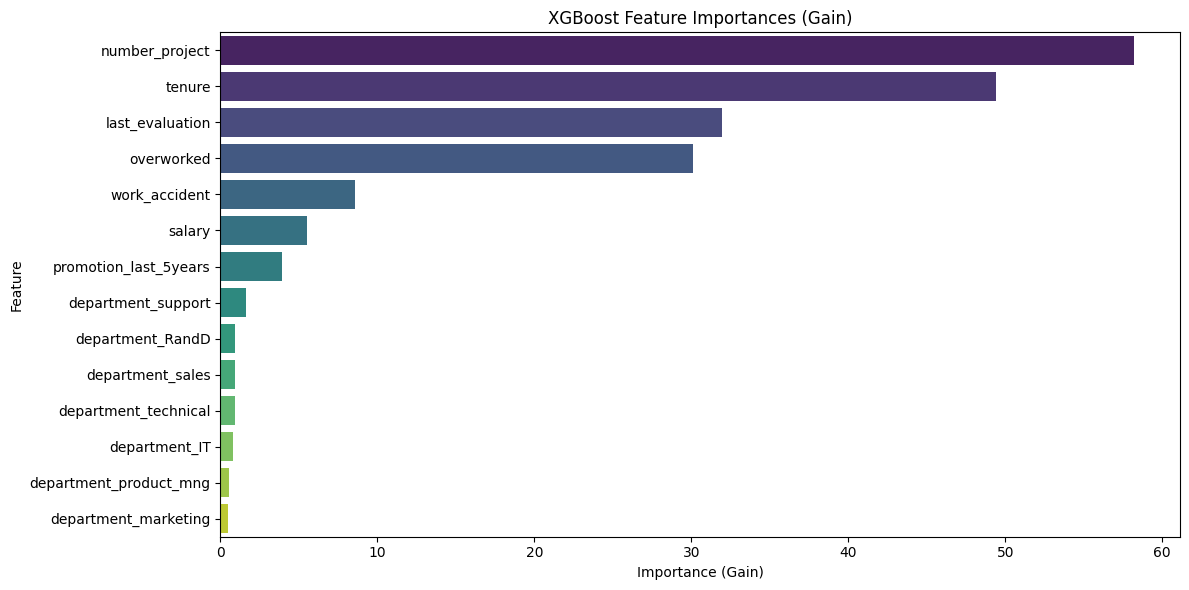

In [414]:
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=importance_df2, palette='viridis')
plt.title('XGBoost Feature Importances (Gain)')
plt.xlabel('Importance (Gain)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [415]:
# Get all CV scores
xgb_model2_cv_results = make_results('xgb_model2', xgb_model2, 'auc')
print(rf1_cv_results)
print(rf2_cv_results)
print(xgb_model1_cv_results)
print(xgb_model2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481
        model  precision    recall        F1  accuracy       auc
0  xgb_model1   0.975793  0.916281  0.945066   0.98232  0.986219
        model  precision    recall        F1  accuracy      auc
0  xgb_model2   0.909276  0.892835  0.900966  0.967419  0.97349


C:\Users\barba\AppData\Local\Temp\ipykernel_19452\2791152204.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\barba\AppData\Local\Temp\ipykernel_19452\2791152204.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


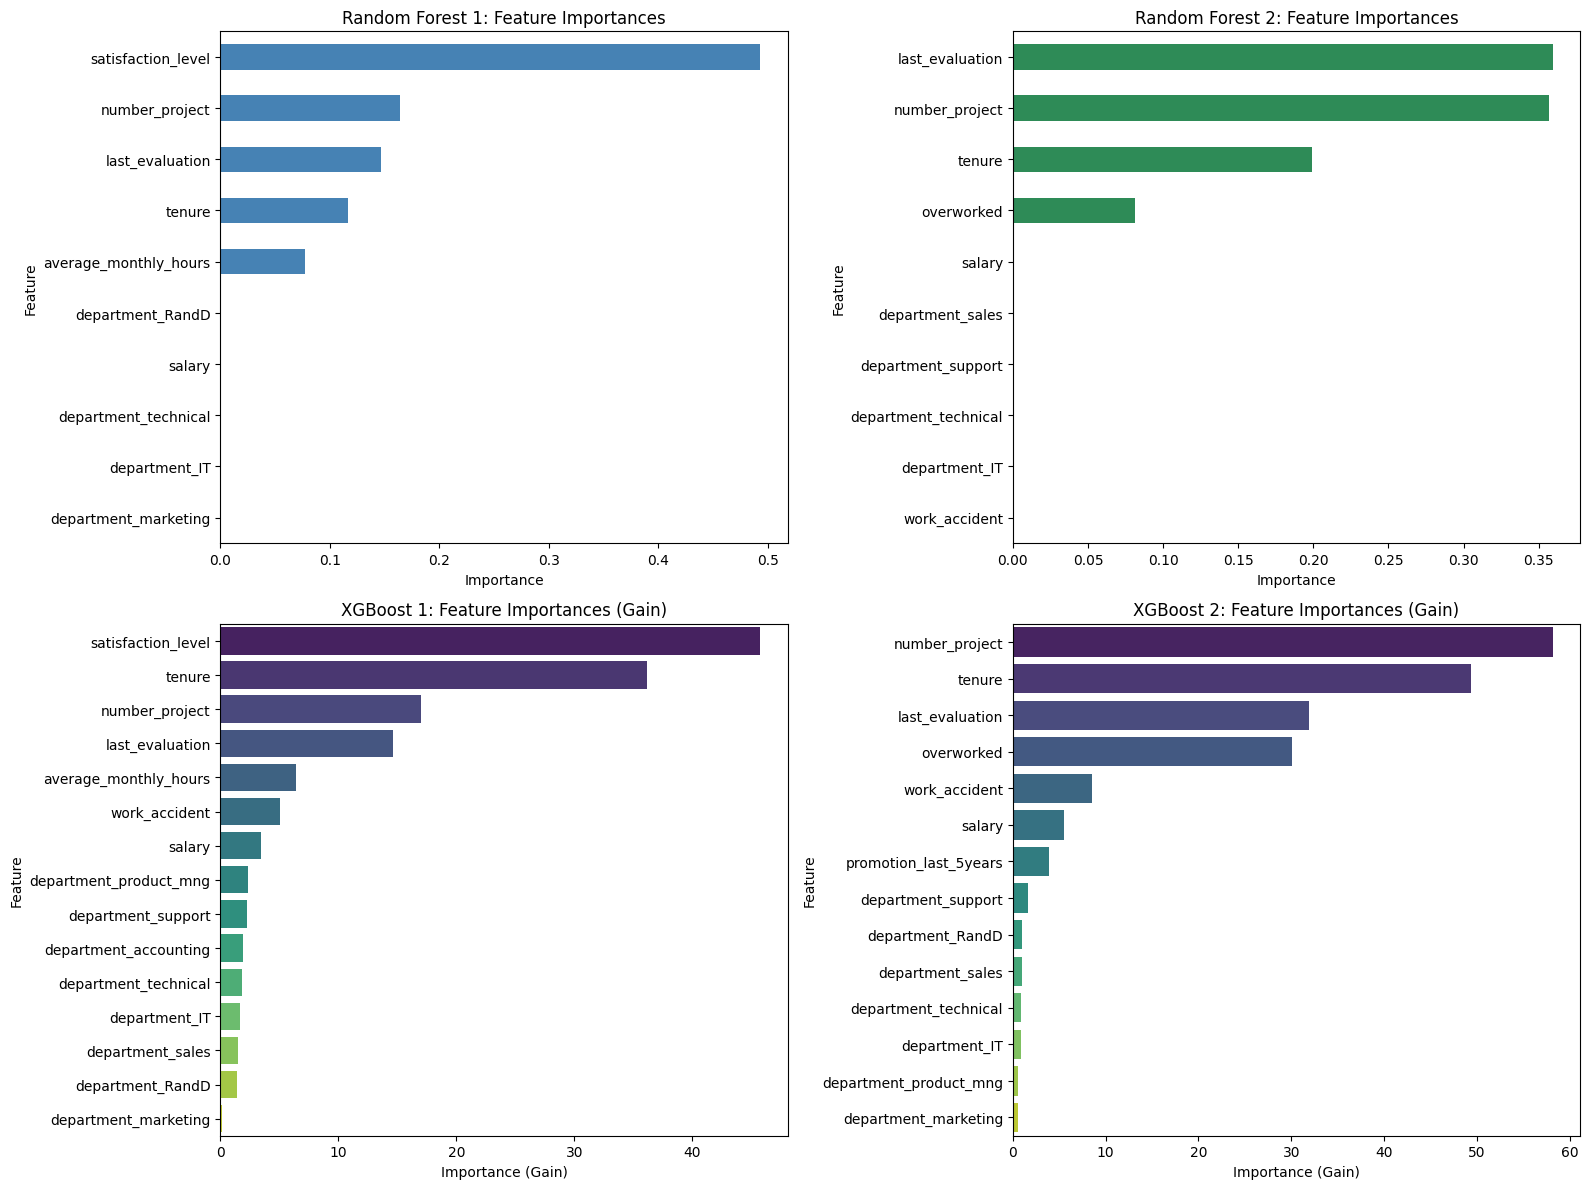

In [416]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot for Random Forest 1
y_sort_df1.plot(
    kind='barh',
    x='feature',
    y='importance',
    ax=axes[0, 0],
    color='steelblue',
    legend=False
)
axes[0, 0].set_title("Random Forest 1: Feature Importances")
axes[0, 0].set_xlabel("Importance")
axes[0, 0].set_ylabel("Feature")

# Plot for Random Forest 2
y_sort_df2.plot(
    kind='barh',
    x='feature',
    y='importance',
    ax=axes[0, 1],
    color='seagreen',
    legend=False
)
axes[0, 1].set_title("Random Forest 2: Feature Importances")
axes[0, 1].set_xlabel("Importance")
axes[0, 1].set_ylabel("Feature")

# Plot for XGBoost 1
sns.barplot(
    x='importance',
    y='feature',
    data=importance_df1,
    palette='viridis',
    ax=axes[1, 0]
)
axes[1, 0].set_title("XGBoost 1: Feature Importances (Gain)")
axes[1, 0].set_xlabel("Importance (Gain)")
axes[1, 0].set_ylabel("Feature")

# Plot for XGBoost 2
sns.barplot(
    x='importance',
    y='feature',
    data=importance_df2,
    palette='viridis',
    ax=axes[1, 1]
)
axes[1, 1].set_title("XGBoost 2: Feature Importances (Gain)")
axes[1, 1].set_xlabel("Importance (Gain)")
axes[1, 1].set_ylabel("Feature")

plt.tight_layout()
plt.show()


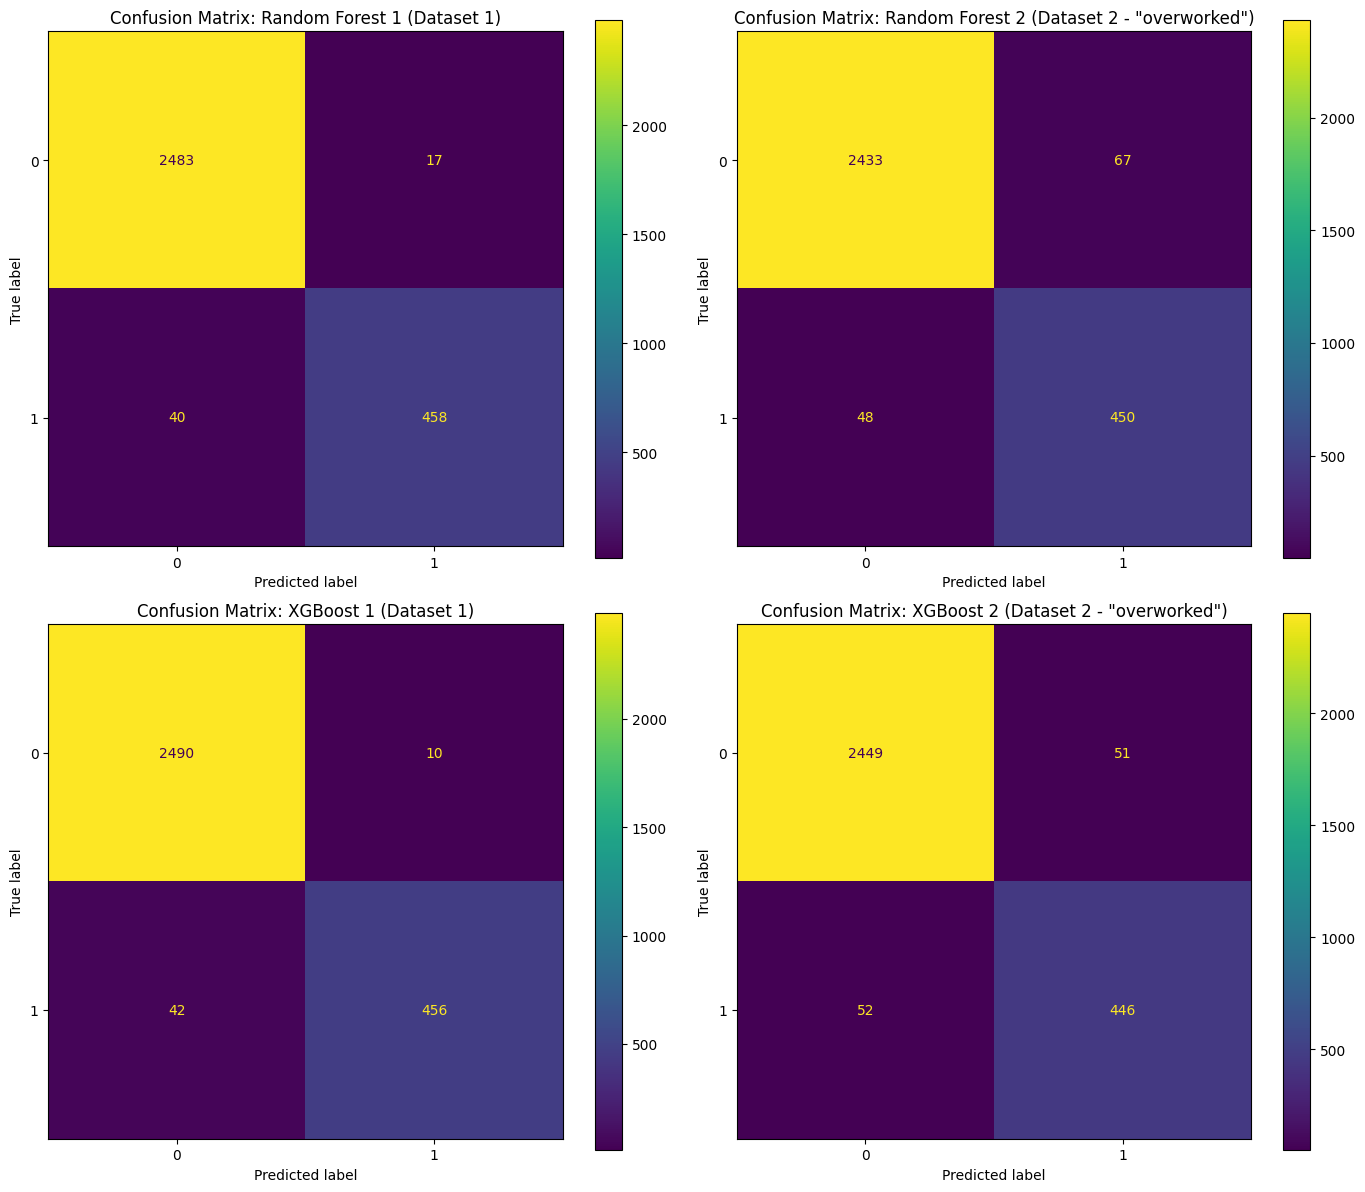

In [427]:
classes_rf1 = rf1.classes_
classes_rf2 = rf2.classes_
classes_xgb1 = xgb_model1.classes_
classes_xgb2 = xgb_model2.classes_

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# --- Plotting the Confusion Matrices in a 2x2 Subplot Grid ---
# This code assumes cm_rf1, classes_rf1, cm_rf2, classes_rf2,
# cm_xgb1, classes_xgb1, cm_xgb2, classes_xgb2 are defined
# correctly as per your debugging output.

fig, axes = plt.subplots(2, 2, figsize=(14, 12)) # Adjust figsize for better visualization

# Plot for Random Forest 1
disp_rf1 = ConfusionMatrixDisplay(confusion_matrix=cm_rf1, display_labels=classes_rf1)
disp_rf1.plot(ax=axes[0, 0], values_format='') # values_format='' to show raw numbers
axes[0, 0].set_title('Confusion Matrix: Random Forest 1 (Dataset 1)')
axes[0, 0].set_xlabel('Predicted label')
axes[0, 0].set_ylabel('True label')

# Plot for Random Forest 2
disp_rf2 = ConfusionMatrixDisplay(confusion_matrix=cm_rf2, display_labels=classes_rf2)
disp_rf2.plot(ax=axes[0, 1], values_format='')
axes[0, 1].set_title('Confusion Matrix: Random Forest 2 (Dataset 2 - "overworked")')
axes[0, 1].set_xlabel('Predicted label')
axes[0, 1].set_ylabel('True label')

# Plot for XGBoost Model 1
disp_xgb1 = ConfusionMatrixDisplay(confusion_matrix=cm_xgb1, display_labels=classes_xgb1)
disp_xgb1.plot(ax=axes[1, 0], values_format='')
axes[1, 0].set_title('Confusion Matrix: XGBoost 1 (Dataset 1)')
axes[1, 0].set_xlabel('Predicted label')
axes[1, 0].set_ylabel('True label')

# Plot for XGBoost Model 2
disp_xgb2 = ConfusionMatrixDisplay(confusion_matrix=cm_xgb2, display_labels=classes_xgb2)
disp_xgb2.plot(ax=axes[1, 1], values_format='')
axes[1, 1].set_title('Confusion Matrix: XGBoost 2 (Dataset 2 - "overworked")')
axes[1, 1].set_xlabel('Predicted label')
axes[1, 1].set_ylabel('True label')

plt.tight_layout() # Adjusts subplot params for a tight layout to prevent overlap
plt.show()

The configurations confirm that the search strategy for hyperparameters was the same for paired models (tree1/tree2, rf1/rf2, xgb_model1/xgb_model2). Therefore, the stark differences in feature importances observed (especially the presence/absence of overworked and the varying importance of satisfaction_level, average_monthly_hours, etc.) are due to the models being fitted on datasets with different feature sets.

rf1 and xgb_model1 were trained on a dataset without the overworked feature but including satisfaction_level and average_monthly_hours.
rf2 and xgb_model2 were trained on a dataset with the overworked feature, which then took on some of the predictive importance previously held by other features.

### K-means

In [419]:
features_for_clustering_df2 = [
    'last_evaluation',         # Performance metric
    'number_project',          # Workload indicator
    'tenure',                  # Experience/loyalty indicator
    'work_accident',           # Binary indicator
    'promotion_last_5years',   # Binary indicator
    'salary',                  # Ordinally encoded salary
    'overworked'               # Your engineered workload indicator
]

X_cluster = df2[features_for_clustering_df2].copy()

In [420]:
from sklearn.preprocessing import StandardScaler

# Example: Assuming X_cluster contains your selected features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

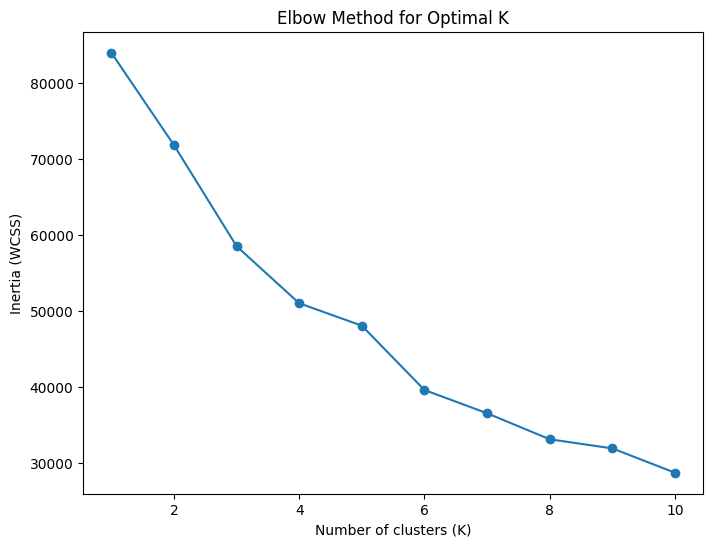

In [421]:
inertia = []
K_range = range(1, 11) # Example range
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') # n_init='auto' or 10
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

For K=2, the average silhouette_score is : 0.6188
For K=3, the average silhouette_score is : 0.2251
For K=4, the average silhouette_score is : 0.2124
For K=5, the average silhouette_score is : 0.1969
For K=6, the average silhouette_score is : 0.2326
For K=7, the average silhouette_score is : 0.2186
For K=8, the average silhouette_score is : 0.2235
For K=9, the average silhouette_score is : 0.2218
For K=10, the average silhouette_score is : 0.2498


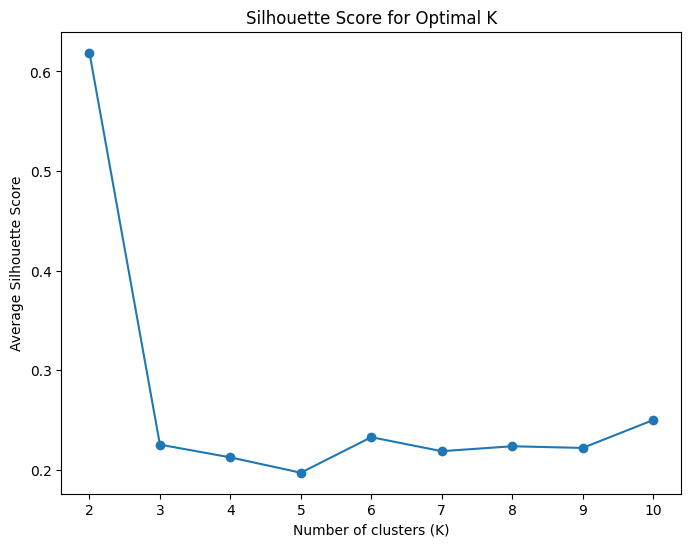

In [422]:
silhouette_avg_scores = []
K_range = range(2, 11) # Silhouette score requires at least 2 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For K={k}, the average silhouette_score is : {silhouette_avg:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_avg_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [423]:
optimal_k = 3 # Replace with your chosen K
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df2['cluster'] = kmeans_final.fit_predict(X_scaled) # Add cluster labels back to your original (or relevant) dataframe

In [424]:
centroids_scaled = kmeans_final.cluster_centers_
centroids_original_scale = scaler.inverse_transform(centroids_scaled) # If X_cluster was a DataFrame
centroid_df = pd.DataFrame(centroids_original_scale, columns=X_cluster.columns) # Assuming X_cluster was a DataFrame
print(centroid_df)

   last_evaluation  number_project    tenure  work_accident  \
0         0.707438        3.798030  3.940887       0.236453   
1         0.746450        4.033307  3.426592       0.154676   
2         0.664942        3.399113  3.229332       0.149696   

   promotion_last_5years    salary    overworked  
0           1.000000e+00  1.029557  6.305419e-01  
1          -1.179612e-16  0.602451  9.994671e-01  
2          -1.075529e-16  0.586175  1.010303e-14  


In [425]:
df2.select_dtypes(include='number').columns
df2['last_evaluation',
    'number_project',
    'tenure',
    'salary',  # Your ordinally encoded salary
    'work_accident',
    'promotion_last_5years',
    'overworked']

KeyError: ('last_evaluation', 'number_project', 'tenure', 'salary', 'work_accident', 'promotion_last_5years', 'overworked')

In [ ]:
cluster_profile = df2.groupby('cluster')[[ # Notice the double square brackets here
    'last_evaluation',
    'number_project',
    'tenure',
    'salary',  # Your ordinally encoded salary
    'work_accident',
    'promotion_last_5years',
    'overworked'
]].mean()
print(cluster_profile)

         last_evaluation  number_project    tenure    salary  work_accident  \
cluster                                                                       
0               0.707438        3.798030  3.940887  1.029557       0.236453   
1               0.746450        4.033307  3.426592  0.602451       0.154676   
2               0.664942        3.399113  3.229332  0.586175       0.149696   

         promotion_last_5years  overworked  
cluster                                     
0                          1.0    0.630542  
1                          0.0    0.999467  
2                          0.0    0.000000  


In [ ]:
churn_rate_per_cluster = df2.groupby('cluster')['left'].mean()
print(churn_rate_per_cluster)

cluster
0    0.039409
1    0.146416
2    0.206446
Name: left, dtype: float64


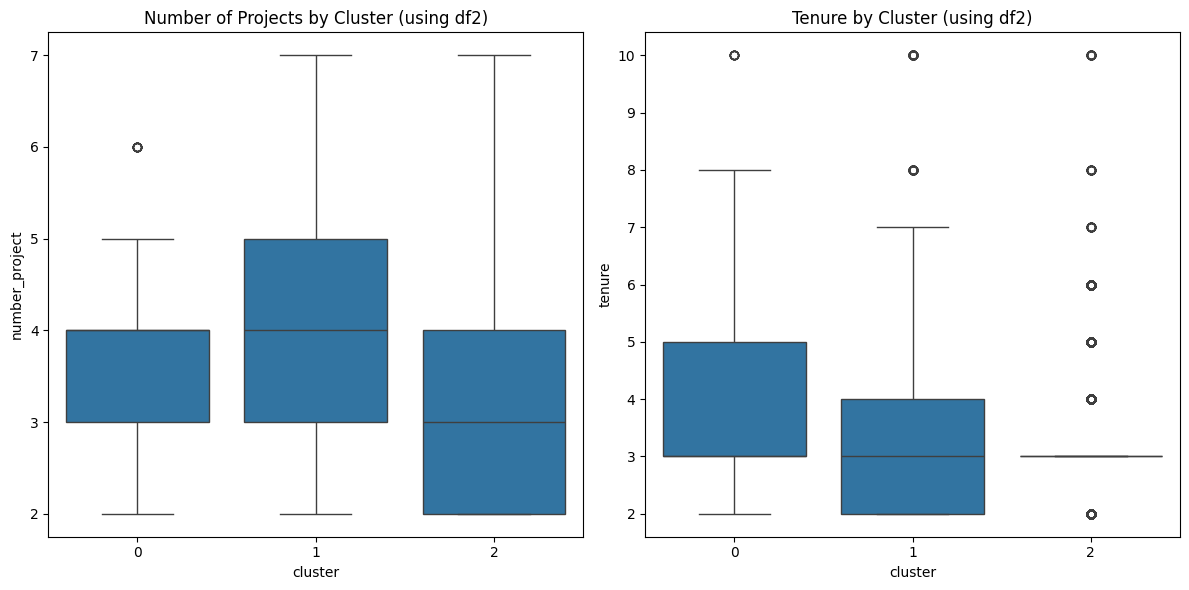

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='cluster', y='number_project', data=df2)
plt.title('Number of Projects by Cluster (using df2)')

plt.subplot(1, 2, 2)
sns.boxplot(x='cluster', y='tenure', data=df2)
plt.title('Tenure by Cluster (using df2)')

plt.tight_layout()
plt.show()

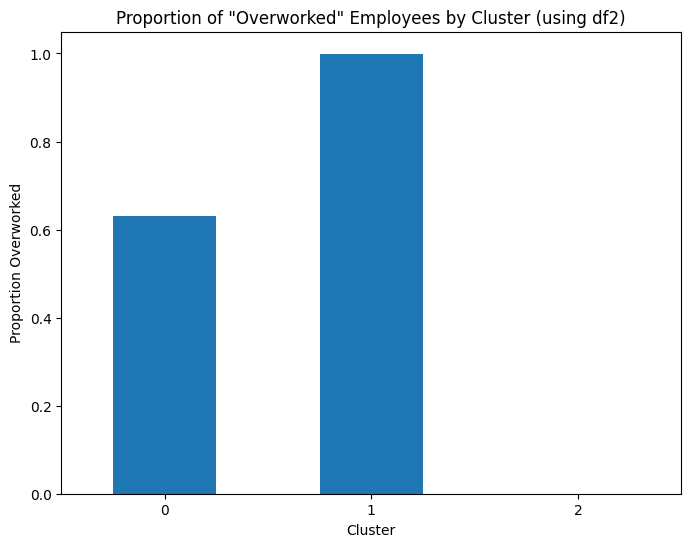

In [ ]:
# Ensure df2 has the 'cluster' column

# Calculate the mean of 'overworked' for each cluster (proportion of overworked employees)
overworked_proportion_per_cluster = df2.groupby('cluster')['overworked'].mean()

plt.figure(figsize=(8, 6))
overworked_proportion_per_cluster.plot(kind='bar')
plt.title('Proportion of "Overworked" Employees by Cluster (using df2)')
plt.xlabel('Cluster')
plt.ylabel('Proportion Overworked')
plt.xticks(rotation=0)
plt.show()

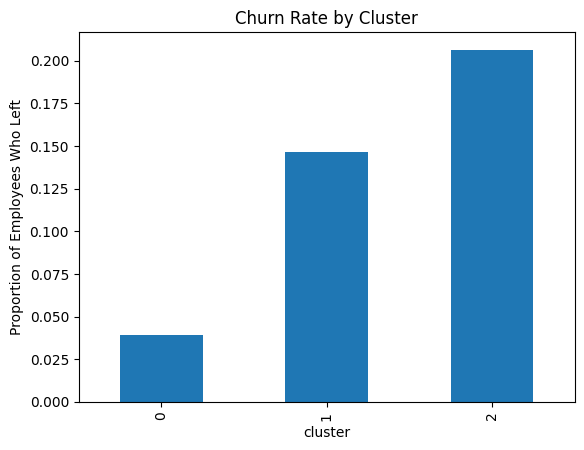

In [ ]:
churn_rate_per_cluster.plot(kind='bar')
plt.title('Churn Rate by Cluster')
plt.ylabel('Proportion of Employees Who Left')
plt.show()

#### Interpretation of Clusters and Actionable Insights for HR:

* **Cluster 0: "The Recognized & Retained Core"**

    * **Profile**: These are employees with moderate to high tenure and medium salaries who have **all been promoted**. They handle a moderate number of projects, have moderate-to-high evaluations, and a fair portion are overworked. Their work accident rate is the highest.

    * **Churn**: Extremely low (3.9%).

    * **Insight for HR**: Promotions are a powerful retention tool. This group, despite some being overworked, stays. The company is successfully retaining its promoted talent. The higher work accident rate warrants investigation for this group – are they in roles with higher risk, or is there a correlation with their work patterns?

* **Cluster 1: "The Overworked High Contributors (At Risk)"**

    * **Profile**: These employees have high evaluations and manage a moderate-high number of projects. They have moderate tenure and low-to-medium salaries. Critically, **none have been promoted, and virtually all are overworked**.

    * **Churn**: Moderate (14.6%).

    * **Insight for HR**: This is a key group to focus on for retention. They are performing well but are likely feeling the strain of being overworked without the recognition of promotion or higher pay. They are a flight risk due to potential burnout or feeling undervalued.

    * **HR Actions**: Review workload distribution, explore non-promotional recognition, ensure fair compensation for their contribution level, and identify pathways for career advancement for these high contributors.

* **Cluster 2: "The Underutilized & Disengaged (Highest Churn)"**

    * **Profile**: This group has the lowest average tenure, project count, and evaluation scores among the three clusters. They have low-to-medium salaries, no promotions, and importantly, they are not overworked (working normal or fewer hours).

    * **Churn**: Highest (20.6%).
    * **Insight for HR**: This is a very interesting finding. The highest churn comes from the group that isn't overworked. This suggests that factors other than workload are primary drivers for their departure. Possible reasons include:

        * Lack of challenging or meaningful work (low project count).
        * Feeling undervalued or stagnant (low evaluations, no promotions).
        * Perhaps newer employees who are not finding their fit or seeing a future in the company.
        * Potential skill mismatch or lack of development opportunities.
    * **HR Actions**: Investigate engagement levels for this group. Are they receiving adequate support, training, and challenging assignments? Is there a clear path for development and contribution? Their lower evaluation scores need to be understood – is it due to performance, or lack of opportunity to showcase their skills?

**Summary of K-means Insights:**

* K-means has successfully identified three distinct employee segments with significantly different characteristics and churn rates.

* Promotions are strongly linked to retention (Cluster 0).

* A segment of high-performing, overworked, but unpromoted employees exists with a moderate churn risk (Cluster 1).

* The highest churn comes from a segment that is not overworked but has lower evaluations, project counts, and no promotions, suggesting disengagement or lack of growth opportunities (Cluster 2).

## Recall evaluation metrics

- ROC Curve (Receiver Operating Characteristic Curve) → A plot of True Positive Rate (TPR) vs. False Positive Rate (FPR) at different classification thresholds.
- AUC Score → The area under the ROC curve, ranging from 0 to 1:
- AUC = 1.0 → Perfect classifier.
- AUC = 0.5 → Random guessing.
- AUC < 0.5 → Worse than random (rare in practice).

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Revised Summary of Model Results**

Several models were evaluated to predict employee churn, including Logistic Regression, Decision Trees, Random Forests, and XGBoost. These models were tested on two primary feature sets: one incorporating original employee metrics like satisfaction_level and average_monthly_hours (Dataset 1), and another that excluded these, instead using an engineered overworked feature (Dataset 2).

**Logistic Regression**

The Logistic Regression model, when applied (likely after addressing outliers for tenure), served as a baseline. It achieved an accuracy of around 82% but showed a limited ability to correctly identify employees who would leave, recall of 0.27 for the "left" class. This suggests that the model tends to predict "stayed" more often than "left," leading to a large number of false negatives. For a business looking to proactively retain employees, this model may miss a substantial portion of those at risk of leaving.

**Tree-based Machine Learning**

Performance on **Dataset 1** (with satisfaction_level, average_monthly_hours):
Models in this group generally showed very high predictive performance, likely influenced significantly by satisfaction_level.

* **Random Forest (rf1)**: Demonstrated the highest performance during cross-validation on this dataset, with an AUC of 0.9791, precision of 0.9857, and accuracy of 0.9840. This indicates it was highly effective at capturing both classes with minimal misclassification in CV.
    * Key Features for rf1 (y_sort_df1): The most influential feature was overwhelmingly satisfaction_level (0.49), followed by number_project (0.16), last_evaluation (0.15), tenure (0.12), and average_monthly_hours (0.08).
* **XGBoost (xgb_model1)**: Also performed exceptionally well on this dataset, with a CV AUC around 0.9801 and a strong Test AUC around 0.957.
    * Key Features for xgb_model1 (importance_df1): satisfaction_level (importance ~45.8) and tenure (~36.1) were the most dominant, followed by number_project (~17.0), last_evaluation (~14.7), and average_monthly_hours (~6.4).
* **Decision Tree (tree1)**: Performed very well in cross-validation with an AUC of 0.9689, showing excellent predictive ability with high recall (0.9224) and precision (0.9632). Feature importances for tree1 (not provided in the new data, but likely similar to rf1 and xgb_model1) would also be dominated by satisfaction_level.

Performance on **Dataset 2** (with engineered overworked feature; satisfaction_level & average_monthly_hours removed):
These models aimed to predict churn without relying on potentially problematic leading indicators like satisfaction_level.

* **Random Forest (rf2)**: Showed good cross-validation performance (though slightly lower than rf1) and robust test results with a Test AUC of 0.9384. It notably captured a high percentage of employees who left (recall: 0.9036) while maintaining reasonable precision.
    * Key Features for rf2 (y_sort_df2): last_evaluation (importance ~0.36) and number_project (~0.36) became the most important, followed by tenure (~0.20) and the engineered overworked feature (~0.08).
* **XGBoost (xgb_model2)**: This model yielded a CV AUC around 0.9677 and a Test AUC around 0.930.
    * Key Features for xgb_model2 (importance_df2): number_project (importance ~58.2) was the most influential, followed by tenure (~49.4), overworked (~30.1), and last_evaluation (~31.9).
* **Decision Tree (tree2)**: Also performed well on this dataset, though with slightly lower precision and accuracy compared to tree1 (which used satisfaction_level). This highlights the impact of the feature set.
    * Key Features for tree2 (likely from its gini_importance previously discussed, not in new data): Would likely show last_evaluation, number_project, tenure, and overworked as top features, similar to rf2 and xgb_model2.

**Summary of Model Results**

* When satisfaction_level is included (Dataset 1): It is by far the most dominant predictor.

* When satisfaction_level is excluded and overworked is introduced (Dataset 2): number_project, tenure, last_evaluation, and the engineered overworked feature become the key drivers. This suggests that workload indicators (number_project, overworked) and employee experience/evaluation (tenure, last_evaluation) are critical factors in predicting churn once direct satisfaction measures are removed.

### **Conclusion, Recommendations, and Next Steps**

The predictive models and feature importance analyses confirm that employee workload and career-related factors are significant drivers of attrition at Salifort Motors. The models utilizing an engineered `overworked` feature, alongside variables like `number_project`, `tenure`, and `last_evaluation`, were particularly insightful for identifying at-risk employees without relying on potentially lagging indicators like `satisfaction_level`.

Furthermore, K-means clustering revealed distinct employee segments: notably, a highly overworked group of contributors with moderate churn, and a group that isn't overworked but exhibits the highest churn, suggesting issues related to engagement or growth opportunities. A third, low-churn group was characterized by having received promotions. These findings underscore that "overwork," while a key factor, interacts with recognition and engagement to influence an employee's decision to leave.

To retain employees, the following recommendations, based on the data, could be presented to stakeholders:

* **Manage Workload:** Cap or closely monitor the `number_project` that employees are assigned, as this was a top predictor of churn risk, particularly for the "Overworked High Contributors" segment.
* **Address Tenure and Growth:**
    * Consider targeted retention strategies for employees around the four-year tenure mark (if your EDA supported this specific timeframe as critical) or conduct further investigation into why `tenure` is a strong predictor across different employee segments.
    * Recognize the powerful retention effect of promotions (as seen in the low-churn "Recognized & Retained Core" cluster) and explore ways to enhance career progression opportunities, especially for the "Overworked High Contributors" and "Underutilized & Disengaged" segments, neither of which saw promotions.
* **Re-evaluate Work Hours and Recognition:**
    * Either ensure employees working extended hours (flagged by the `overworked` feature or high `average_monthly_hours`) are adequately rewarded and recognized, or adjust workload expectations to prevent burnout, particularly for the "Overworked High Contributors."
    * Ensure company policies regarding workload, overtime, and time-off are explicit and clearly communicated to all employees.
* **Foster a Supportive Work Culture and Fair Evaluation:**
    * Initiate discussions (company-wide and within teams, potentially informed by K-means segment characteristics) to understand and address cultural aspects contributing to overwork or disengagement (especially for the "Underutilized & Disengaged" cluster).
    * Ensure `last_evaluation` scores are part of a fair and constructive feedback process. Critically, high evaluation scores should not be implicitly tied only to employees working excessive hours; reward contributions proportionately.

**Next Steps**

1.  **Investigate `last_evaluation` Further:** Given its consistent importance, it's prudent to explore the timing and nature of these evaluations. Determine if there's a risk of data leakage (e.g., evaluations occurring after an employee's disengagement has already begun). Consider building models with and without this feature to understand its true proactive predictive power.
2.  **Deepen Cluster Analysis & Action:**
    * Further analyze the K-means clusters. For example, examine the departmental distribution within the "Underutilized & Disengaged" cluster to see if specific departments are more affected.
    * Develop and pilot targeted intervention strategies based on the unique profiles and needs of each identified employee segment.
3.  **Refine Workload Indicators:** Explore more nuanced ways to define or measure "overwork" beyond a single threshold, potentially incorporating `number_project` or other factors.
4.  **Qualitative Feedback:** Supplement these quantitative findings with qualitative feedback (surveys, interviews) from the identified employee segments to better understand their specific motivations and pain points.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.